<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Deep-Learning/blob/main/MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST model

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Tasvirlarni tensor va normalizatsiya qilish

transform = transforms.Compose([
    transforms.ToTensor(),                  # [0,255] -> [0,1]
    transforms.Normalize((0.5,), (0.5,))    # -1 dan 1 gacha normalizatsiya
])

# Train test datani torchvision yordamida yuklab olish

train_data = torchvision.datasets.MNIST(
    download = True, train = True, root = './data', transform = transform
)

test_data = torchvision.datasets.MNIST(
    download = True, train = False, root = './data', transform = transform
)

train_set = torch.utils.data.DataLoader(train_data, shuffle = True, batch_size = 64)
test_set = torch.utils.data.DataLoader(test_data, shuffle = True, batch_size = 64)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 464kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 15.9MB/s]


In [2]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [3]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


losses = []

n_epoches = 5

for epoch in range(n_epoches):

    one_train_loss = 0.0
    count = 0

    for images, labels in train_set:
        count += 1
        optimizer.zero_grad()

        predict = model(images)
        loss_values = criterion(predict, labels)

        one_train_loss += loss_values.item()

        loss_values.backward()
        optimizer.step()

    losses.insert(epoch, one_train_loss / count)


    print(f'Epoch : {epoch+1}, loss : {losses[epoch]}')

Epoch : 1, loss : 0.7597613875259722
Epoch : 2, loss : 0.36897033808836294
Epoch : 3, loss : 0.32429576132184407
Epoch : 4, loss : 0.2988719260657647
Epoch : 5, loss : 0.2791704881324697


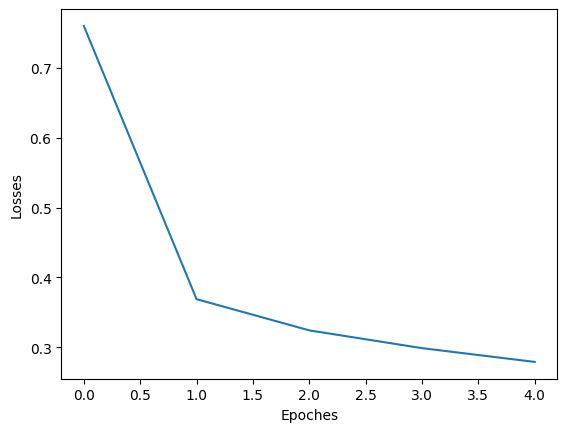

In [4]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoches')
plt.ylabel('Losses')
plt.show()

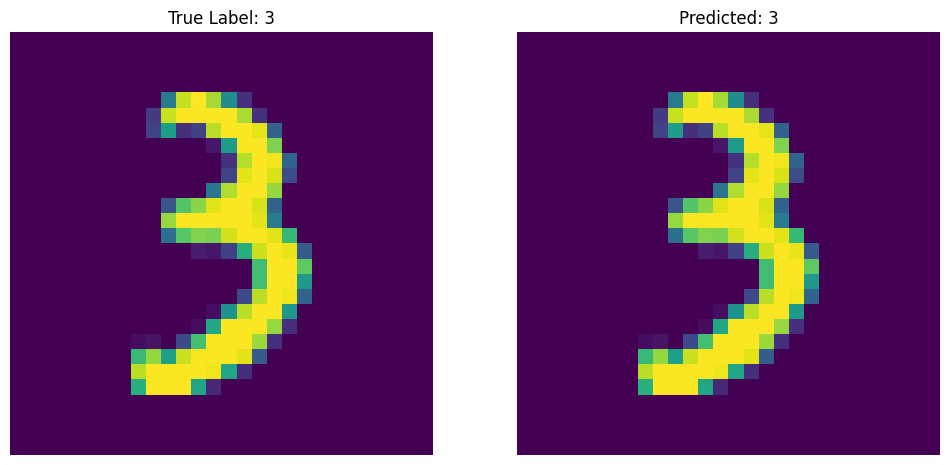

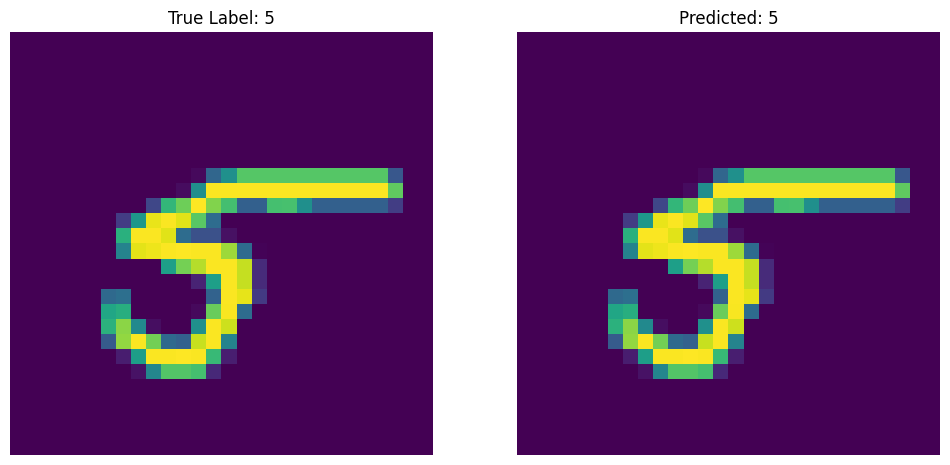

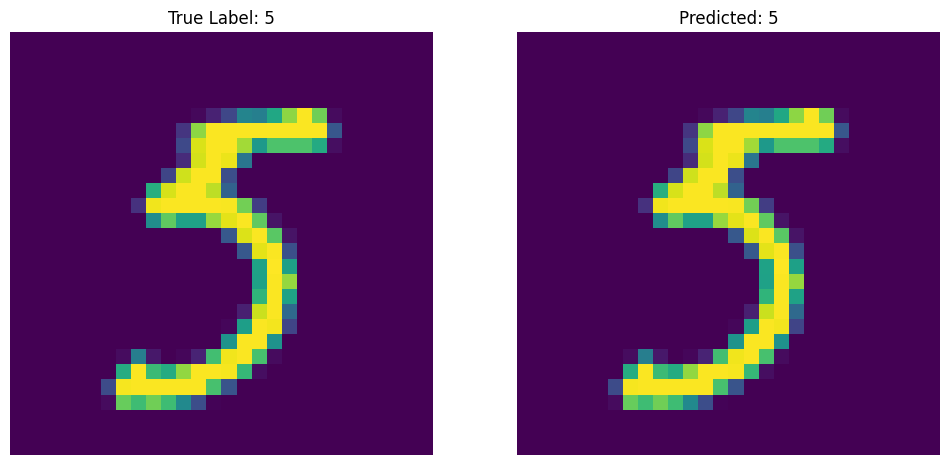

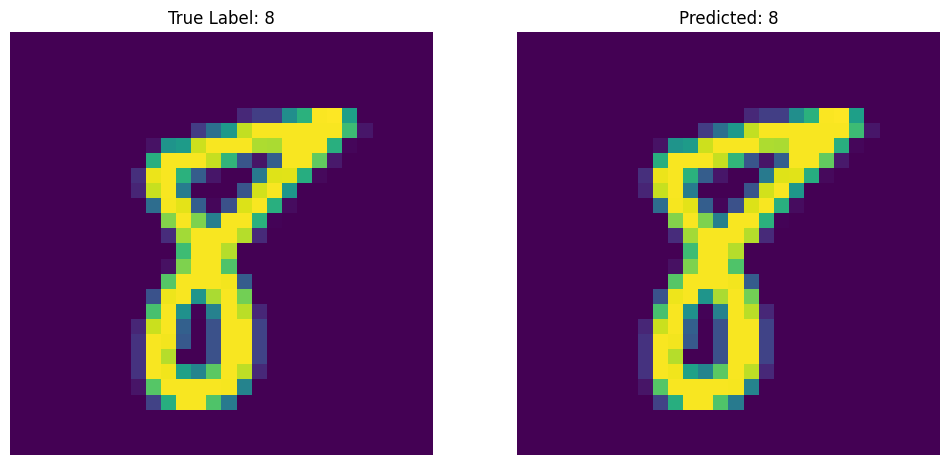

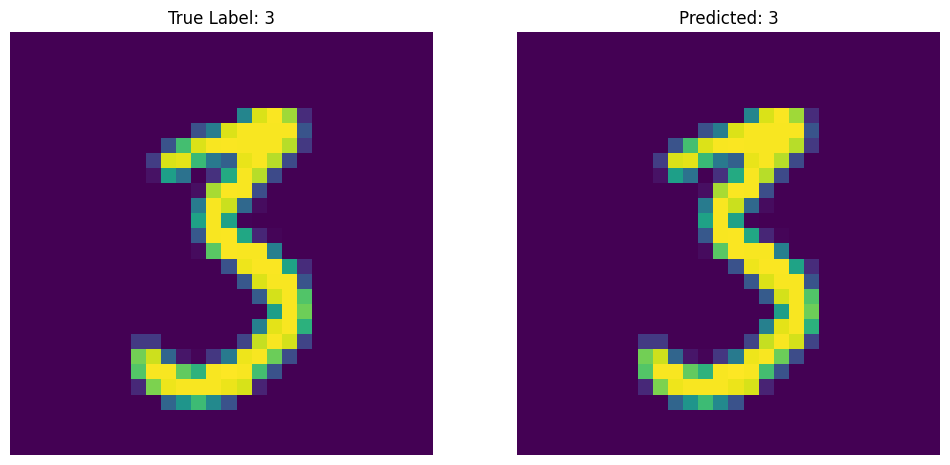

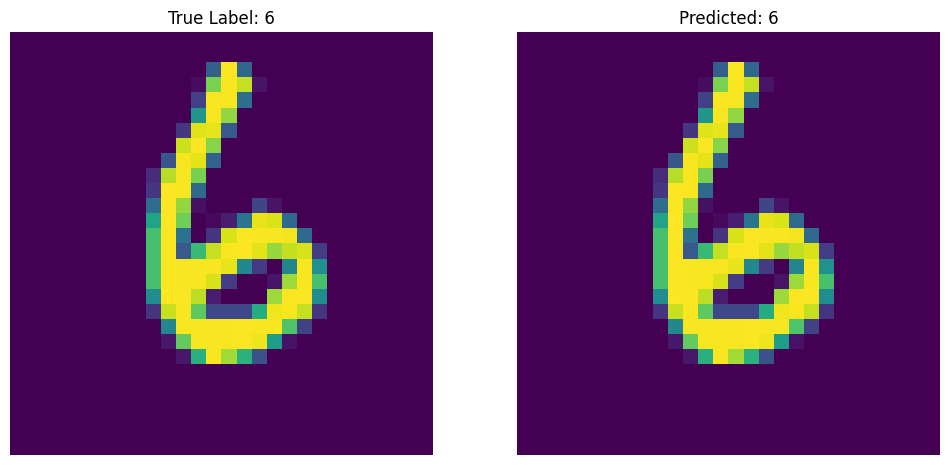

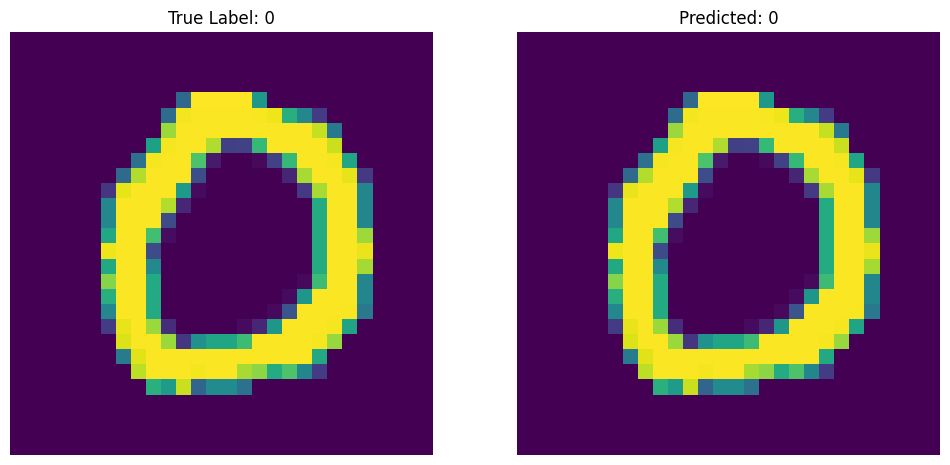

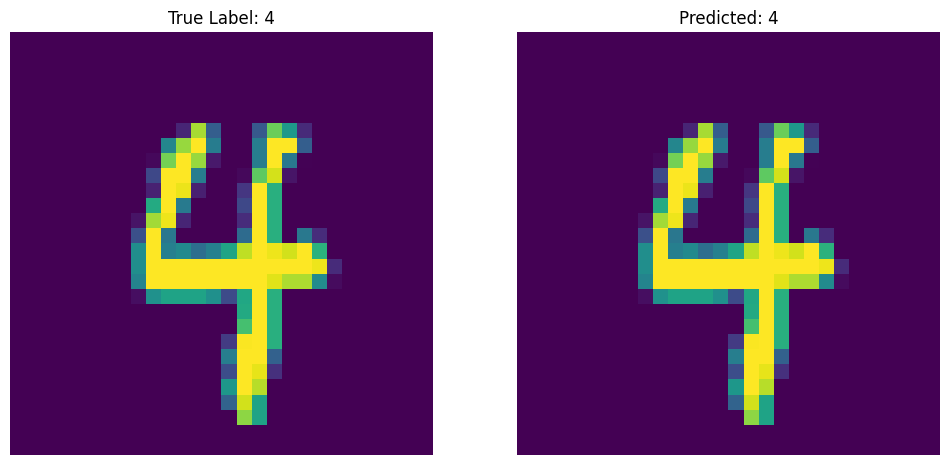

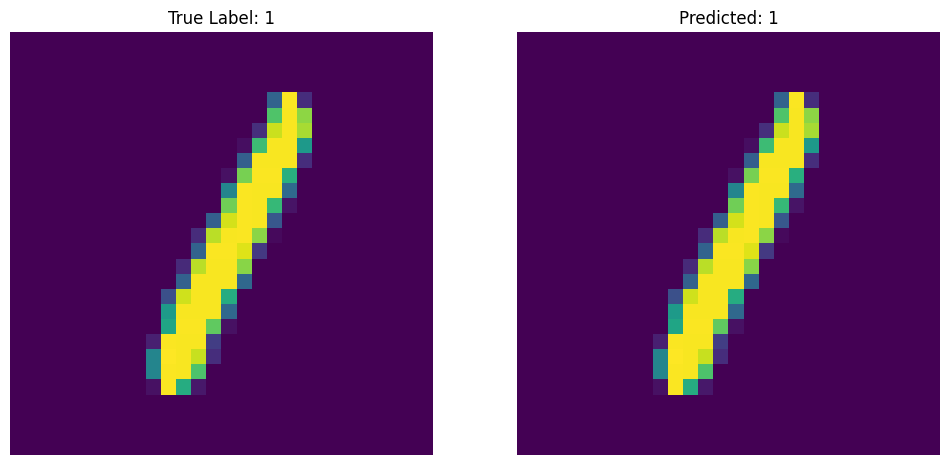

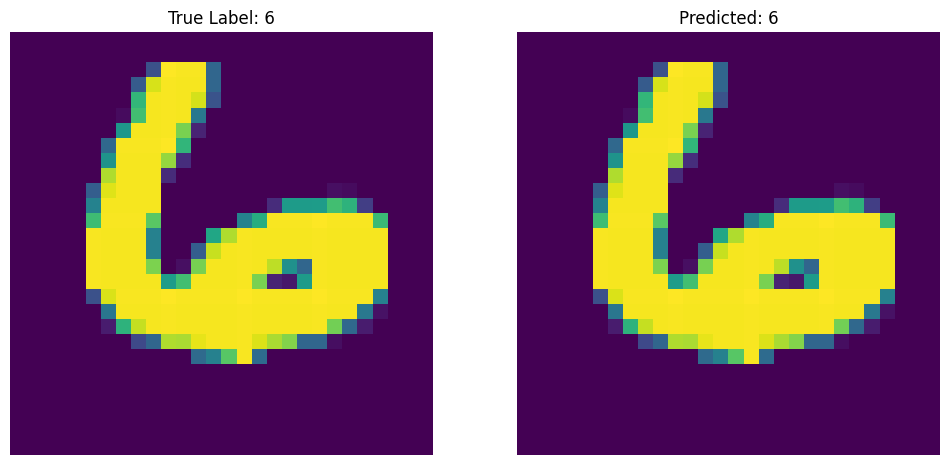

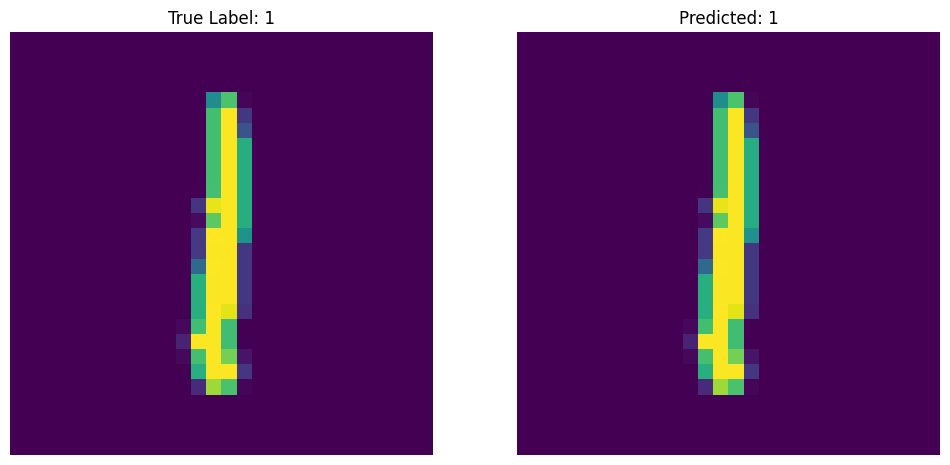

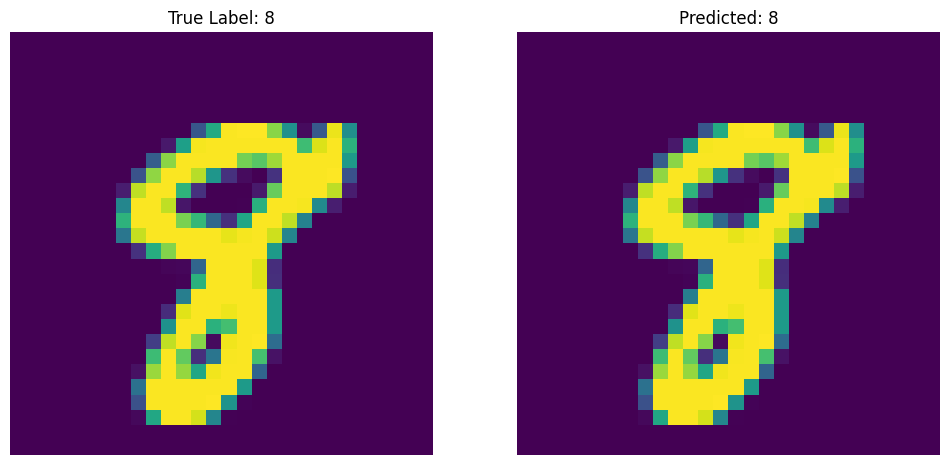

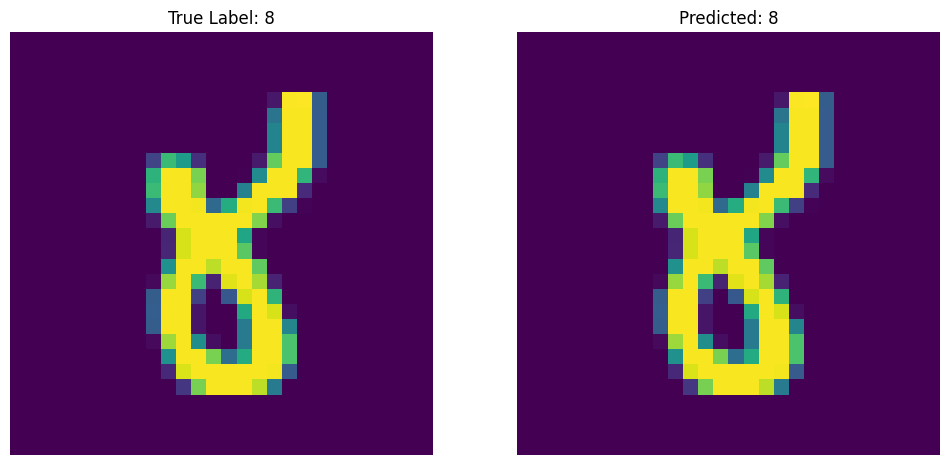

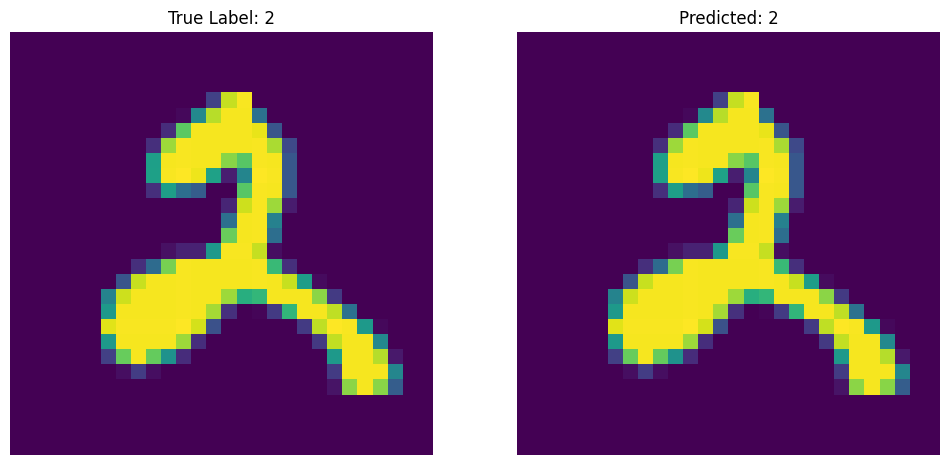

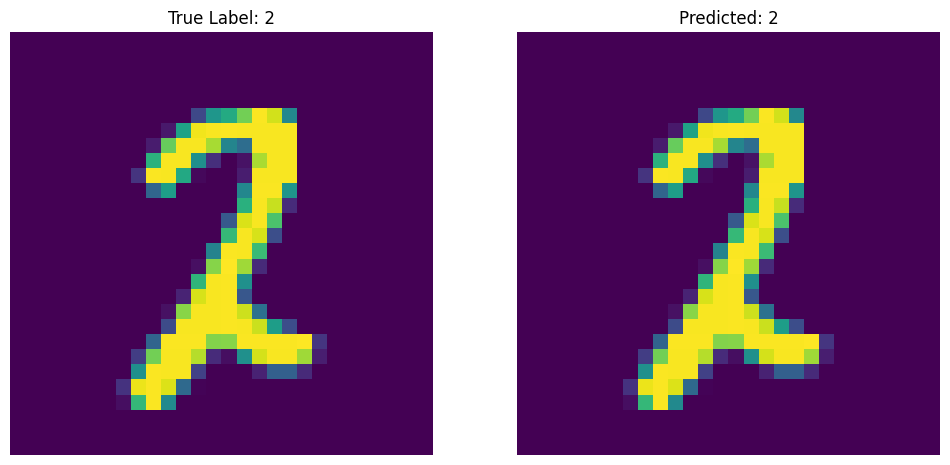

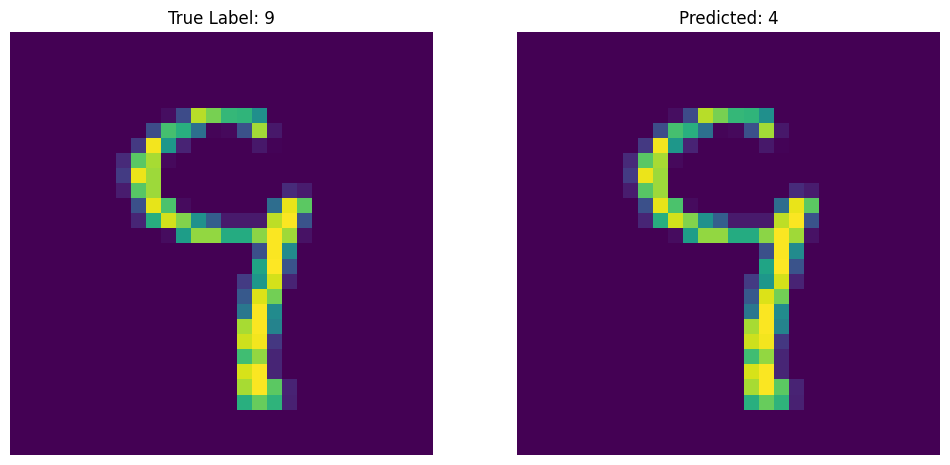

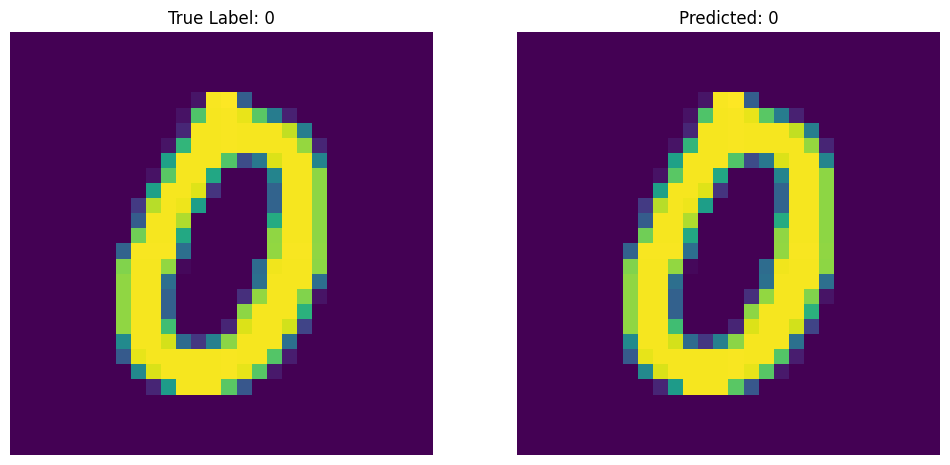

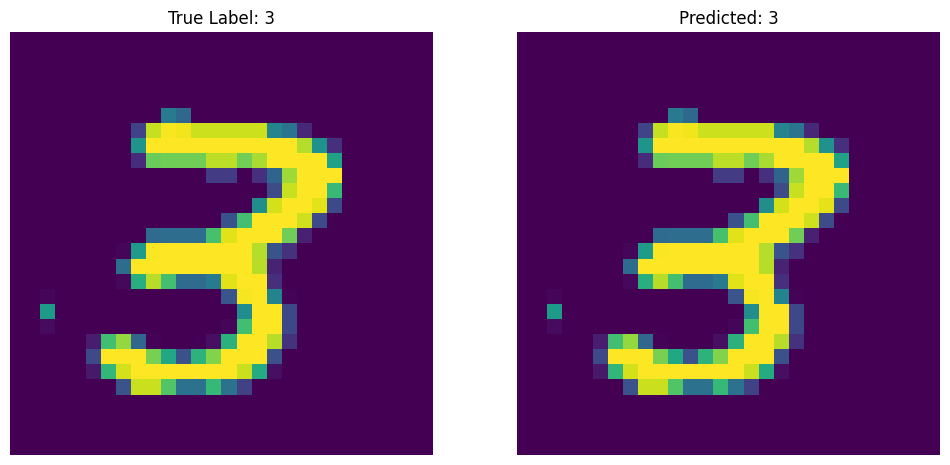

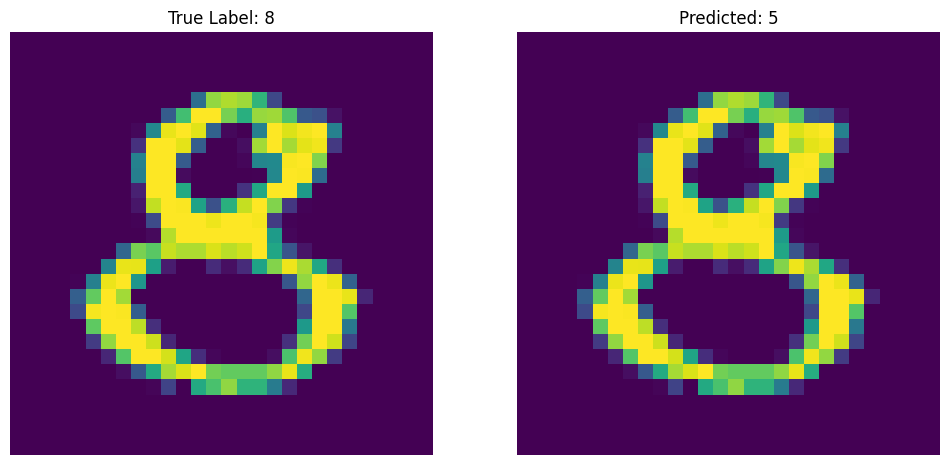

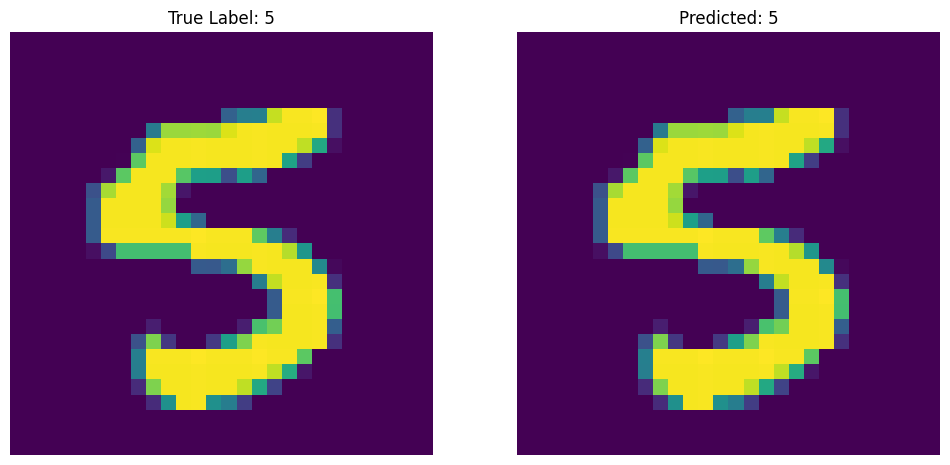

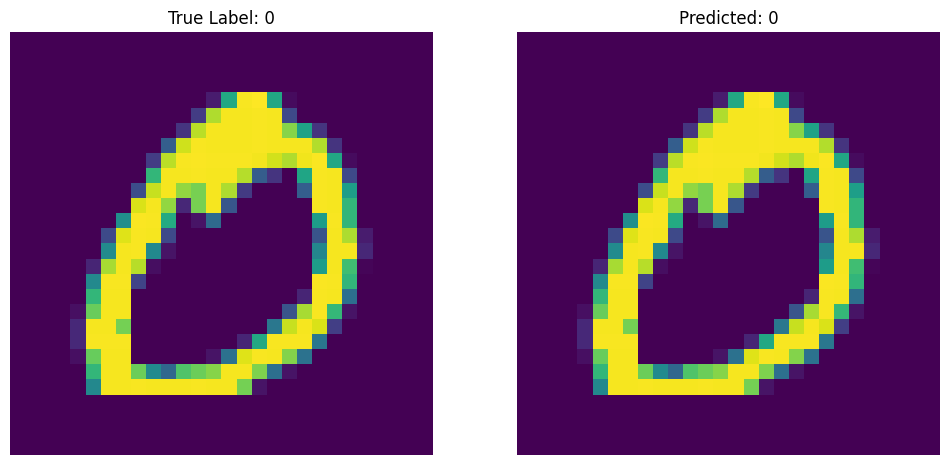

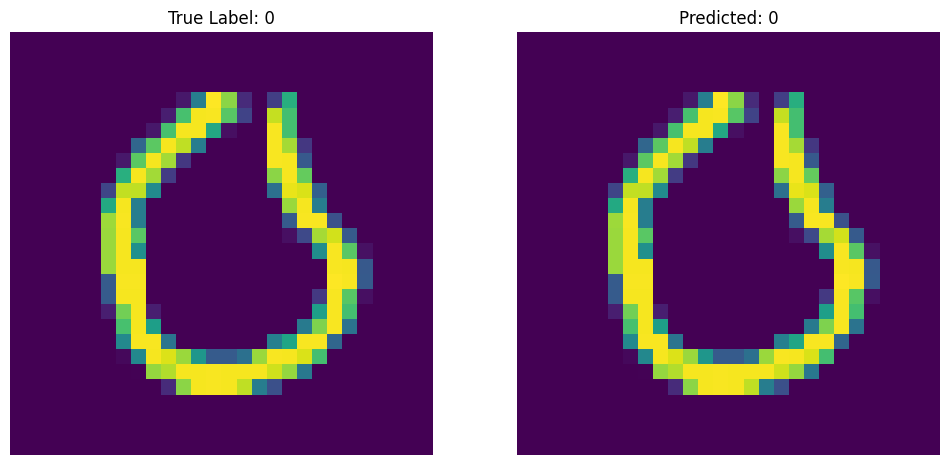

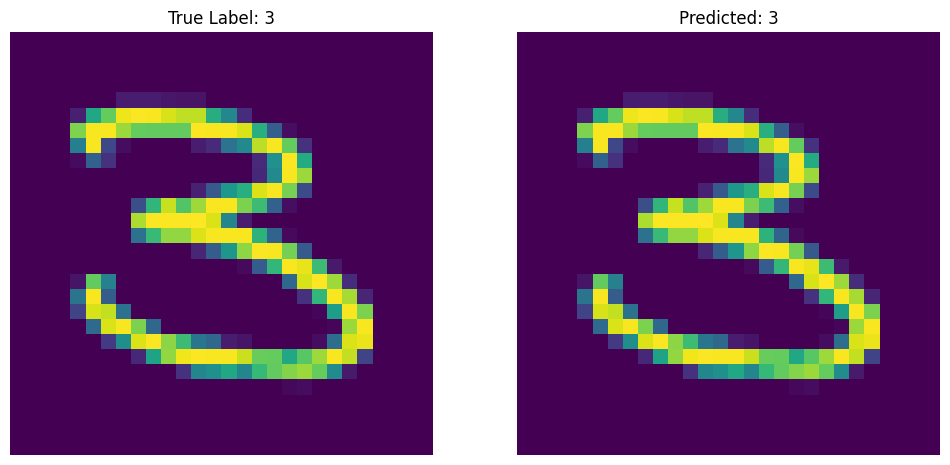

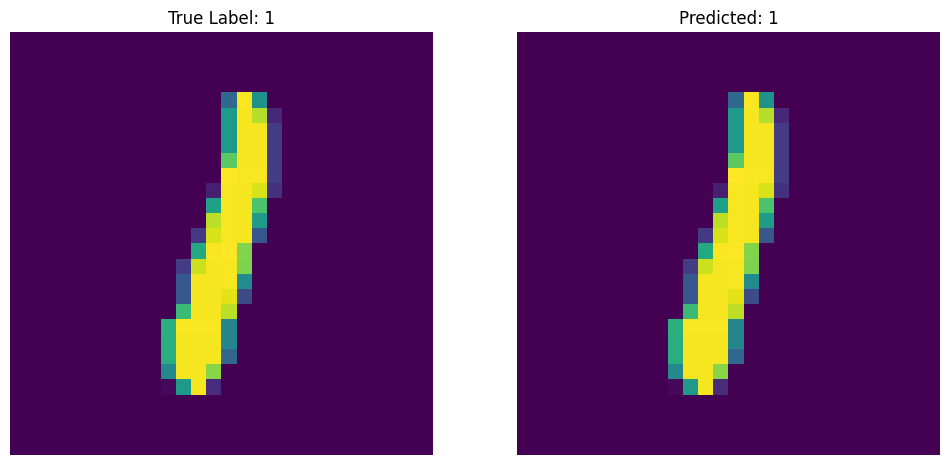

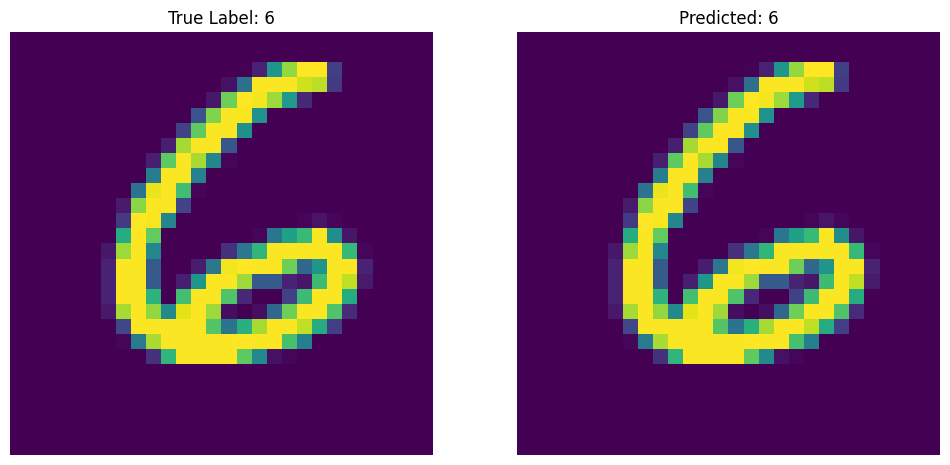

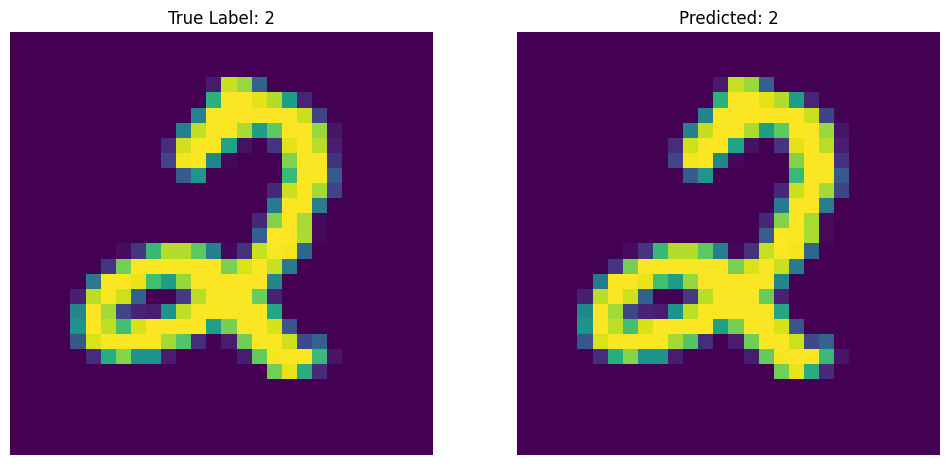

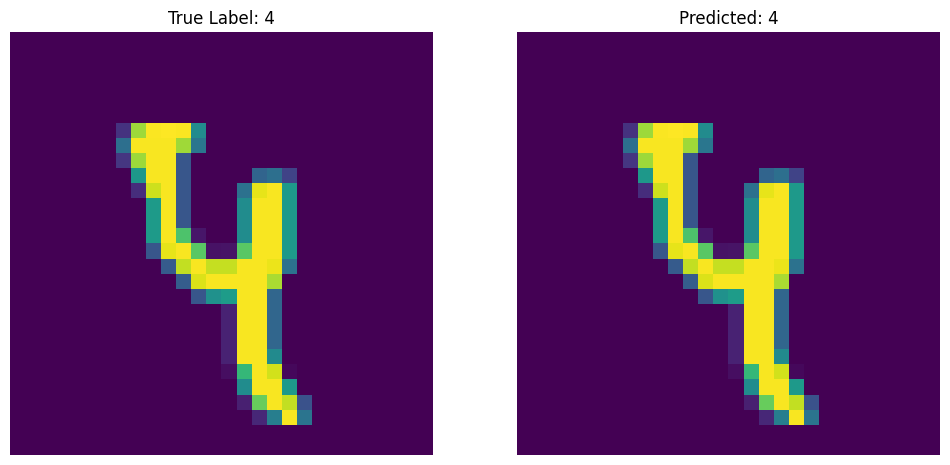

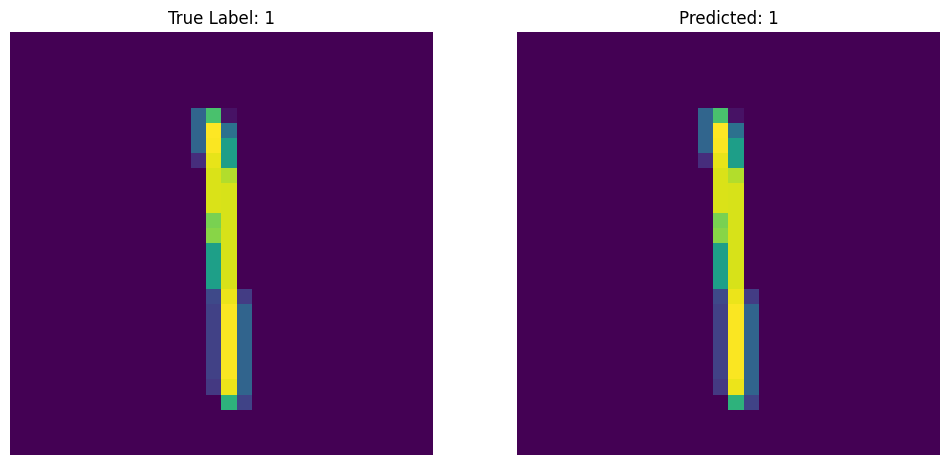

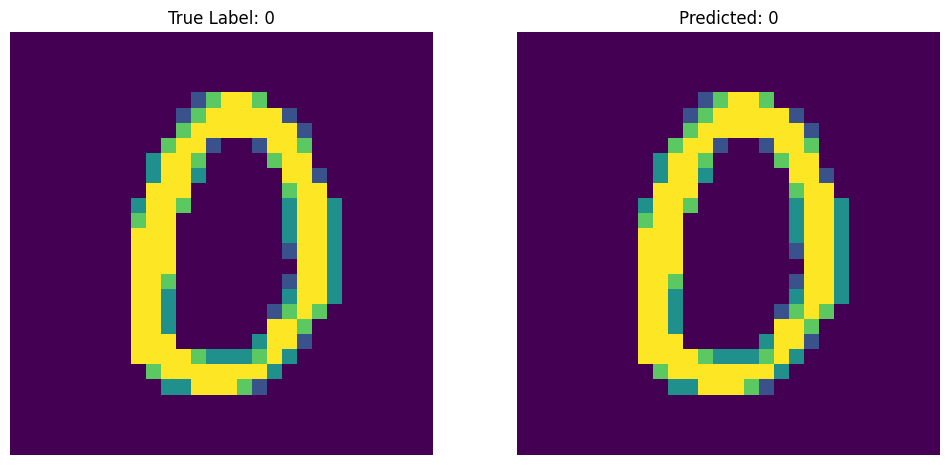

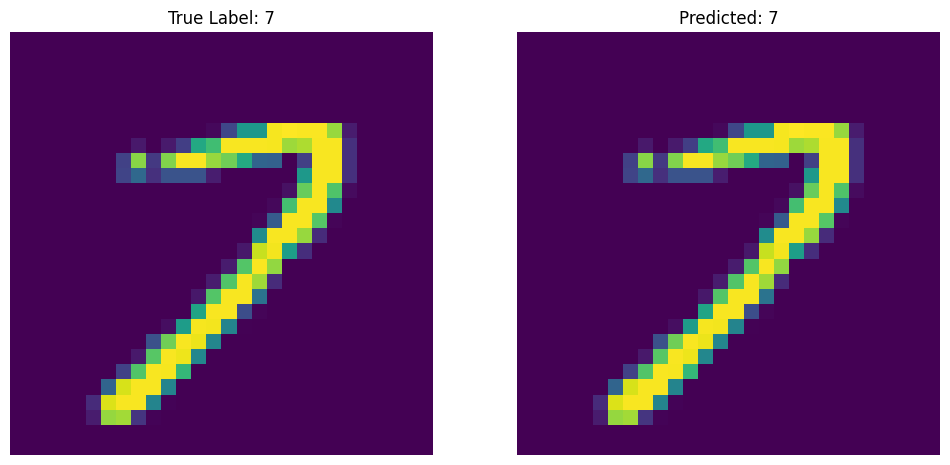

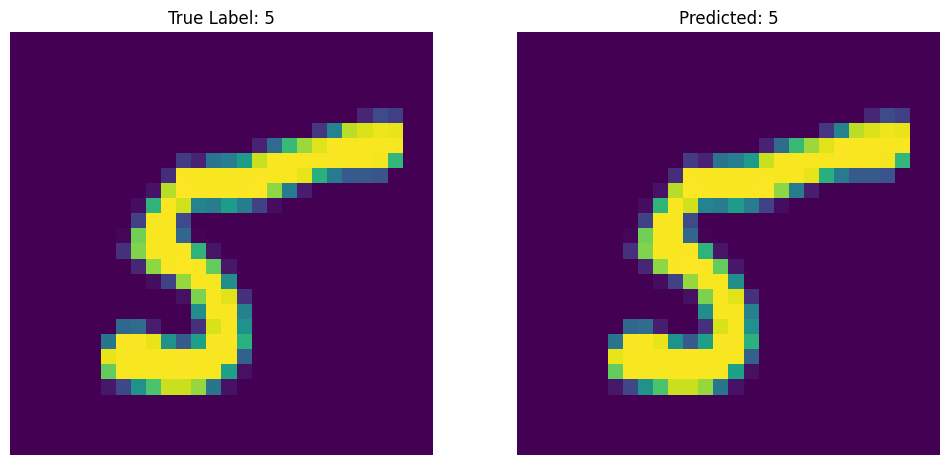

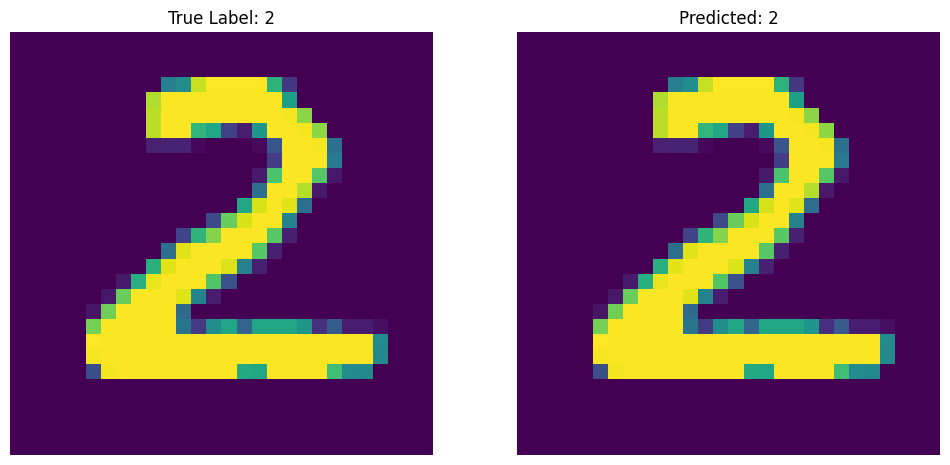

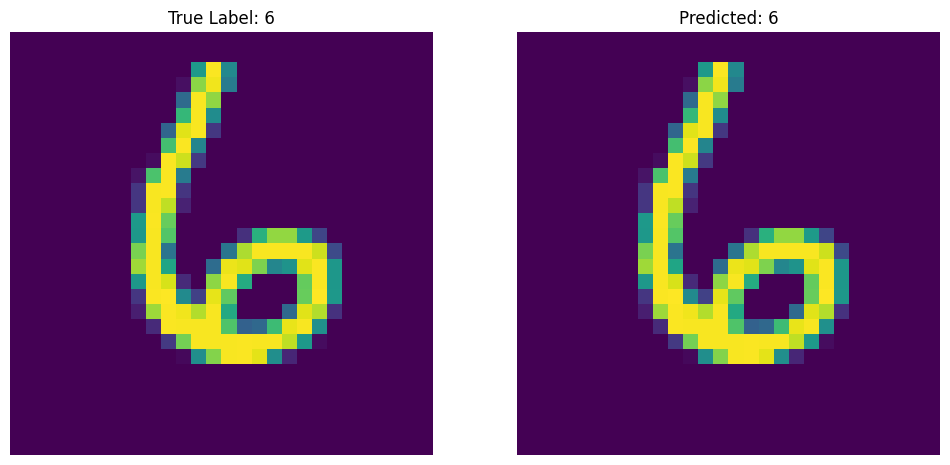

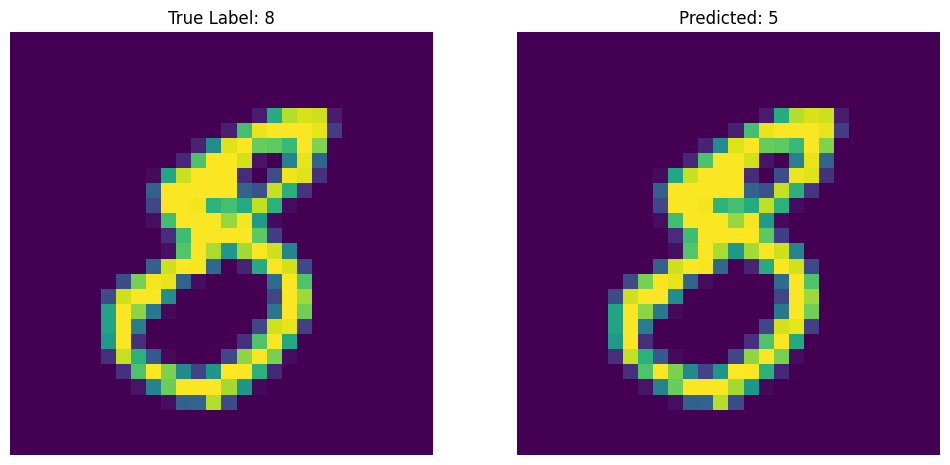

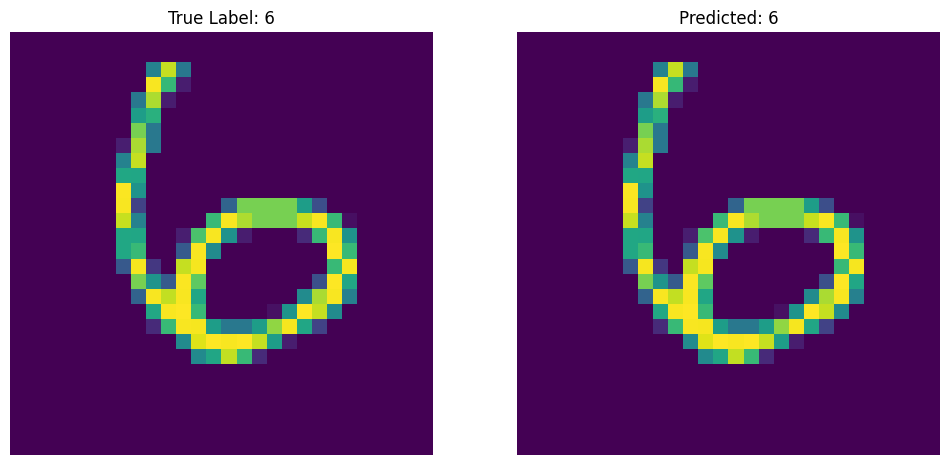

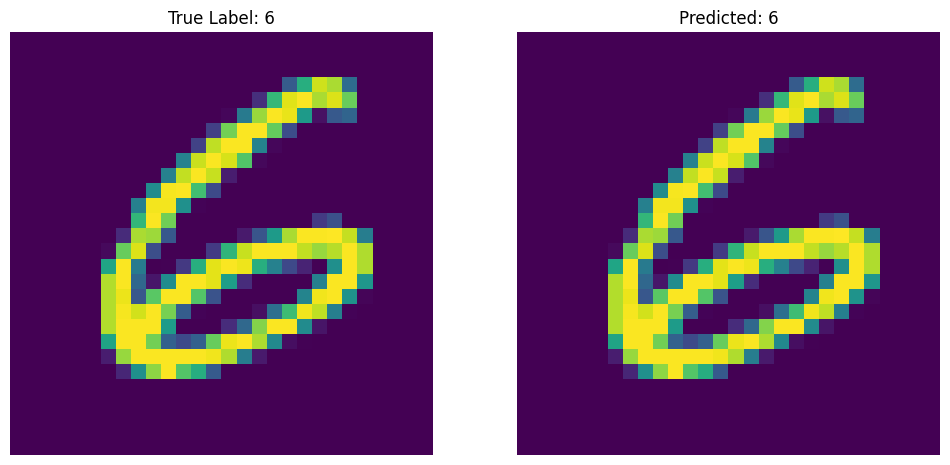

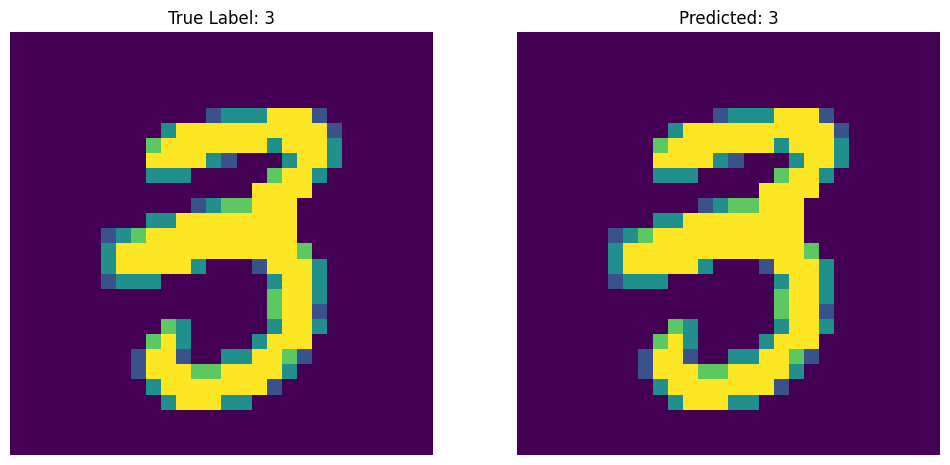

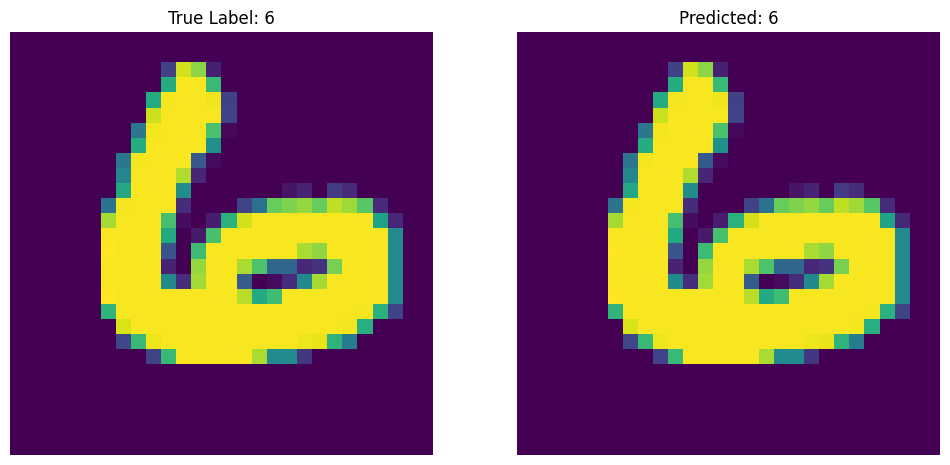

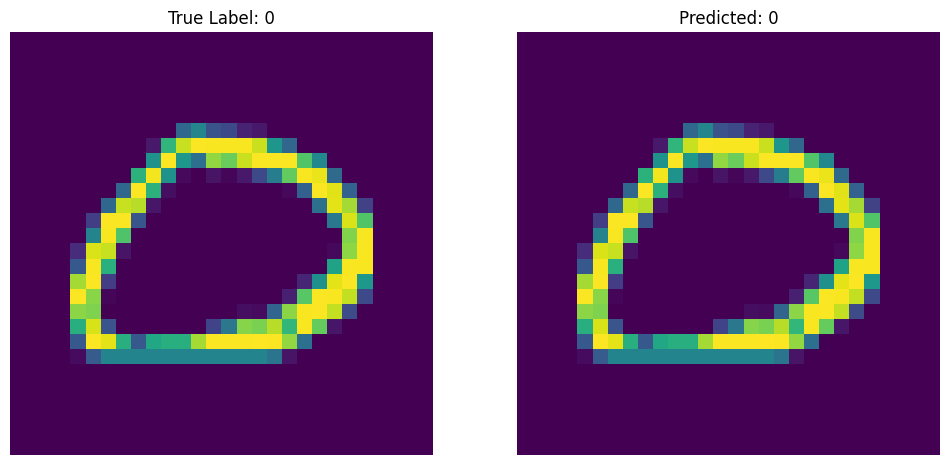

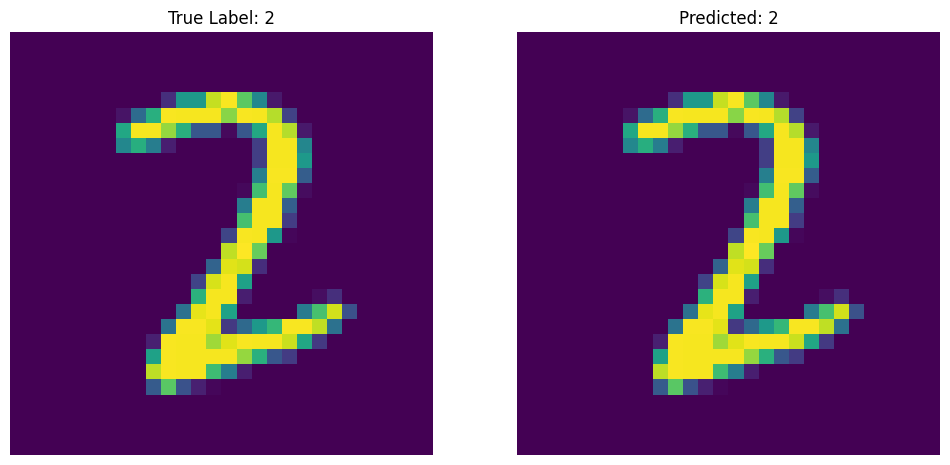

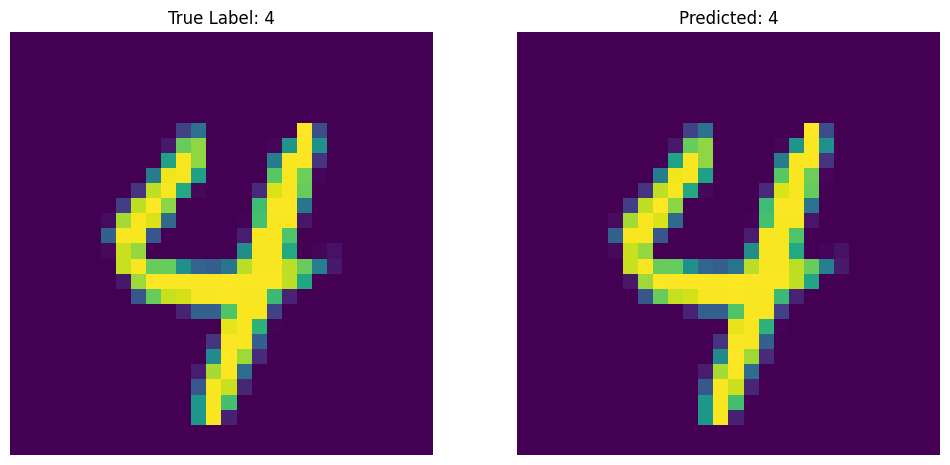

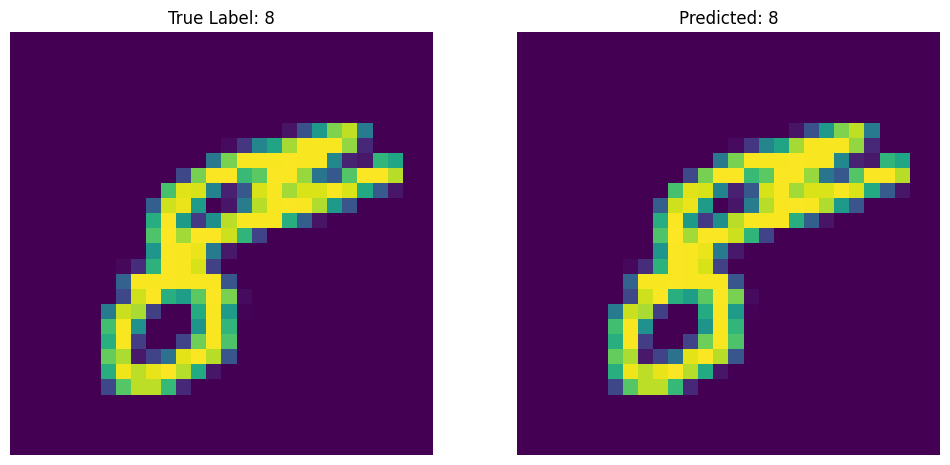

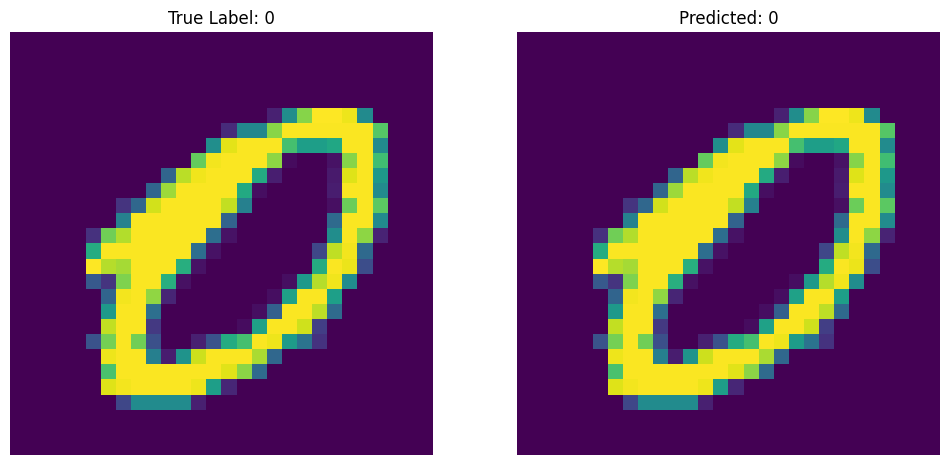

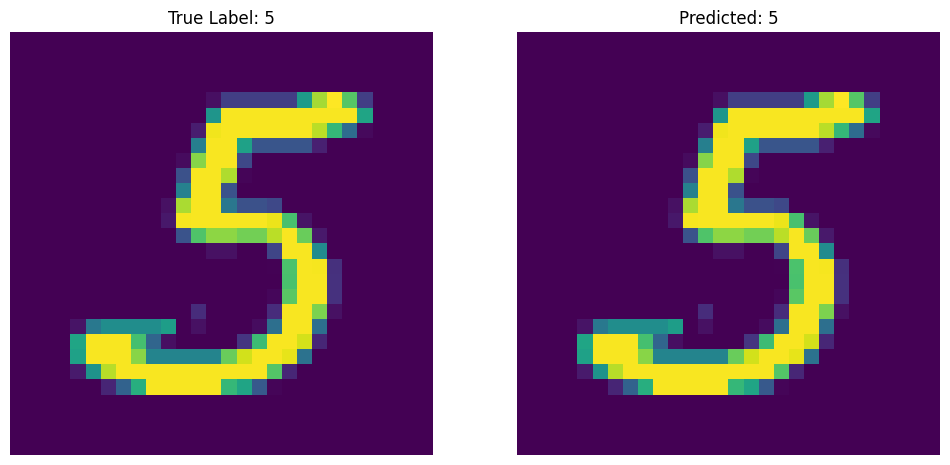

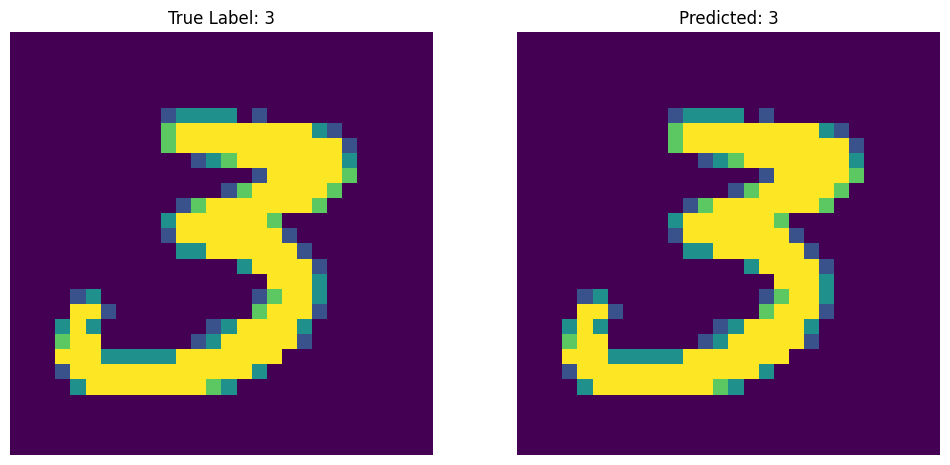

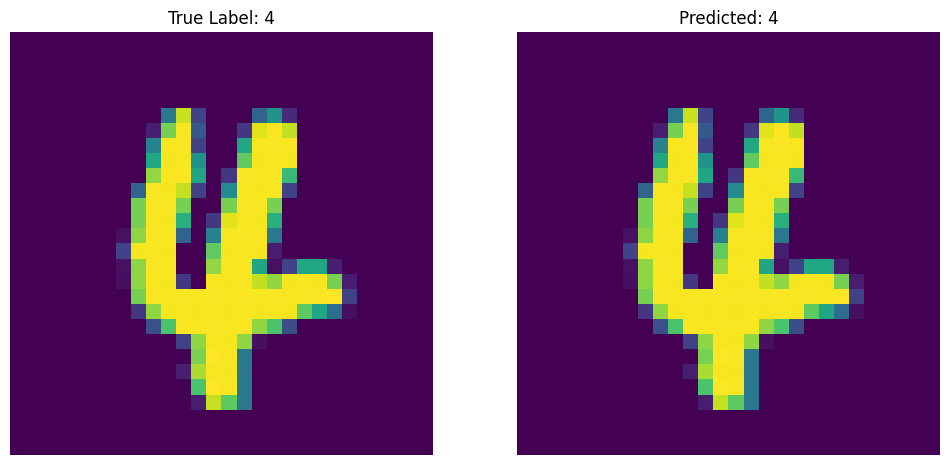

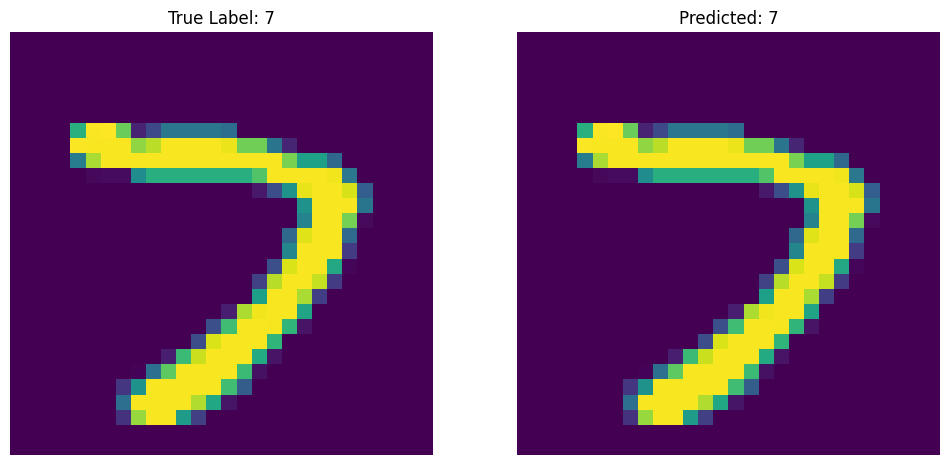

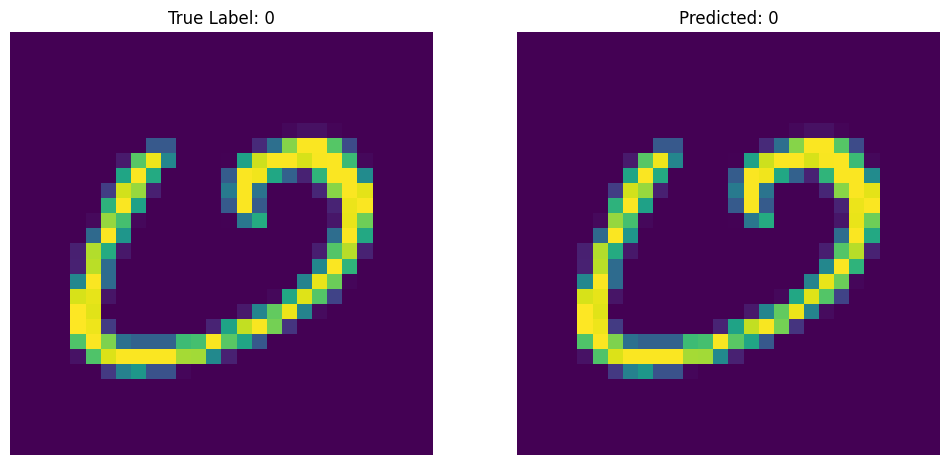

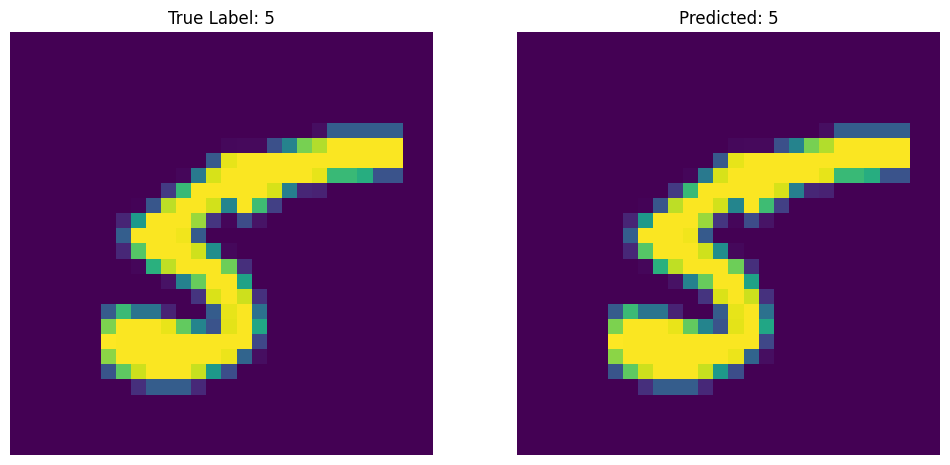

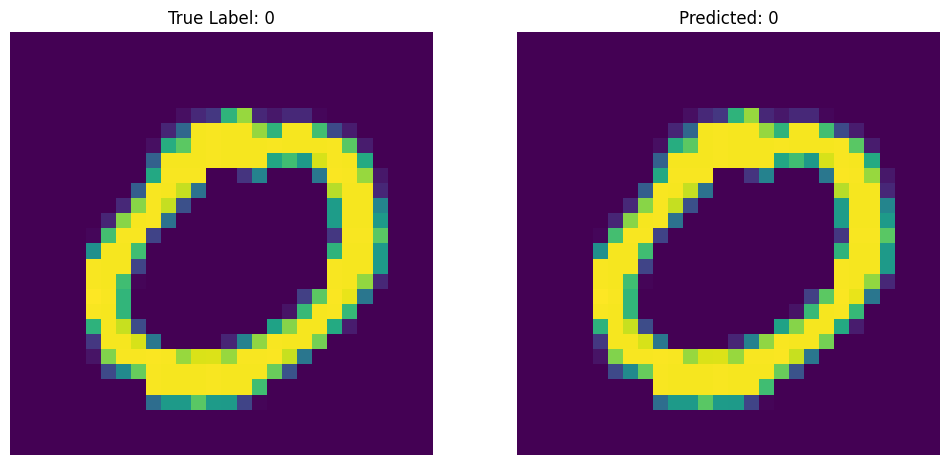

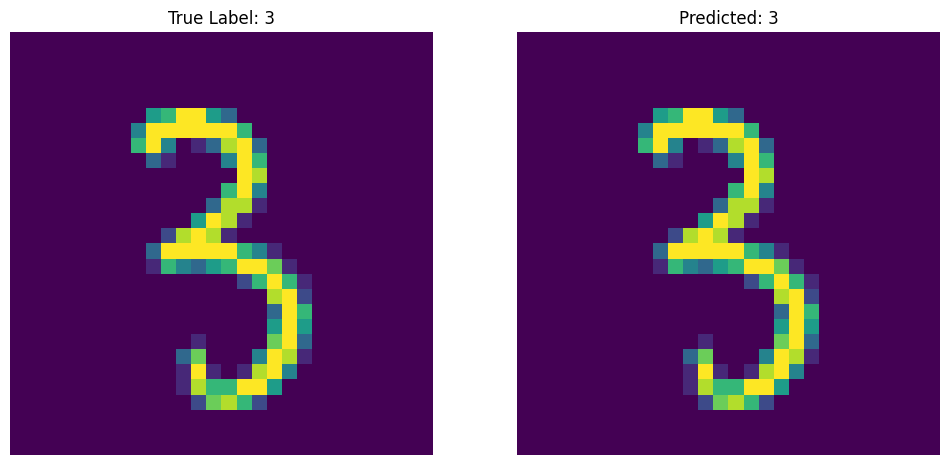

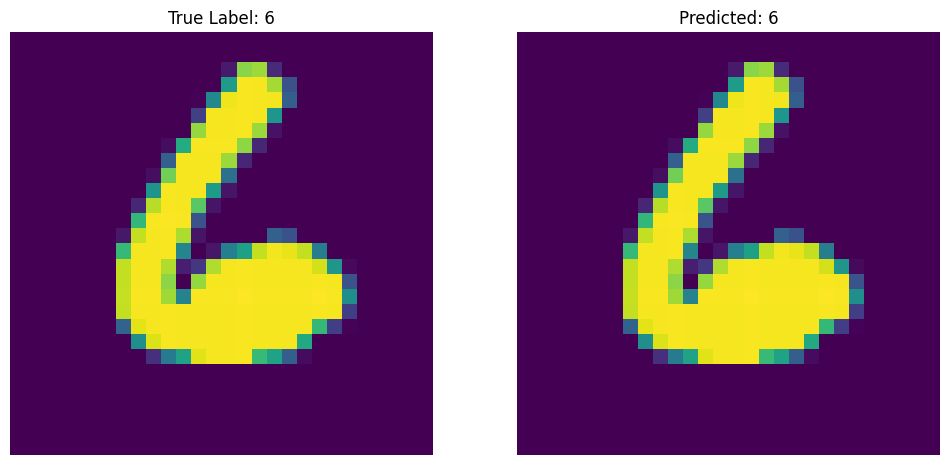

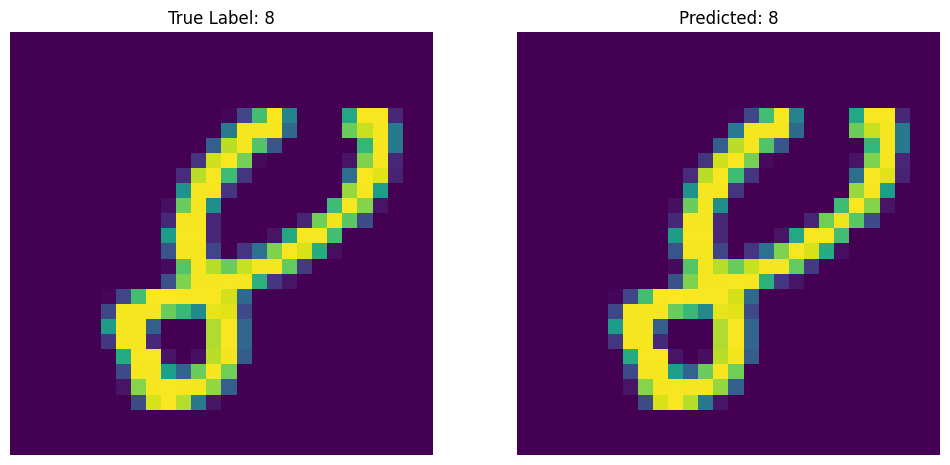

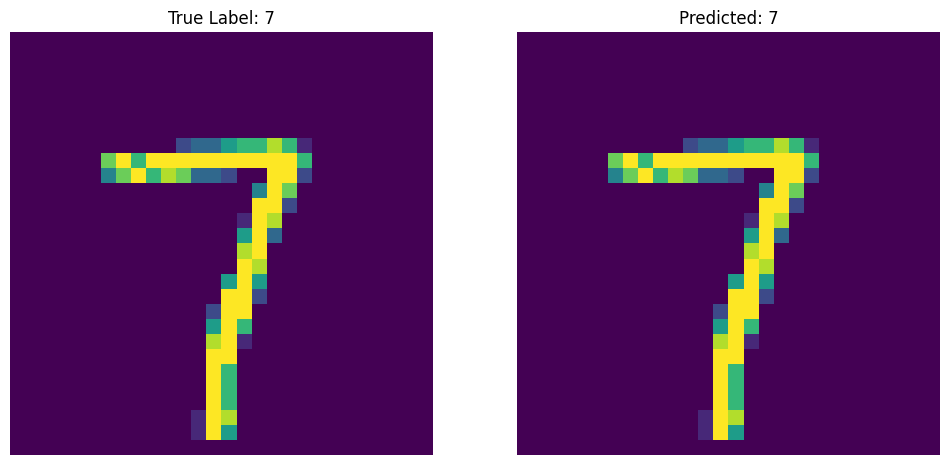

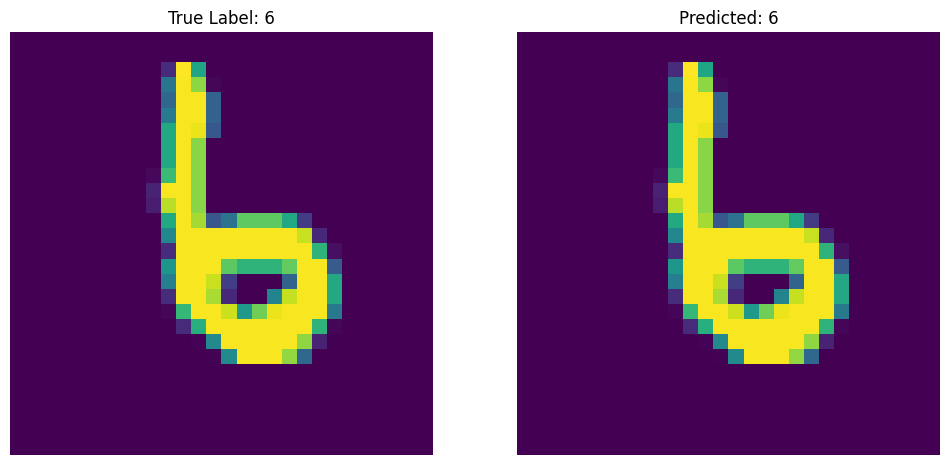

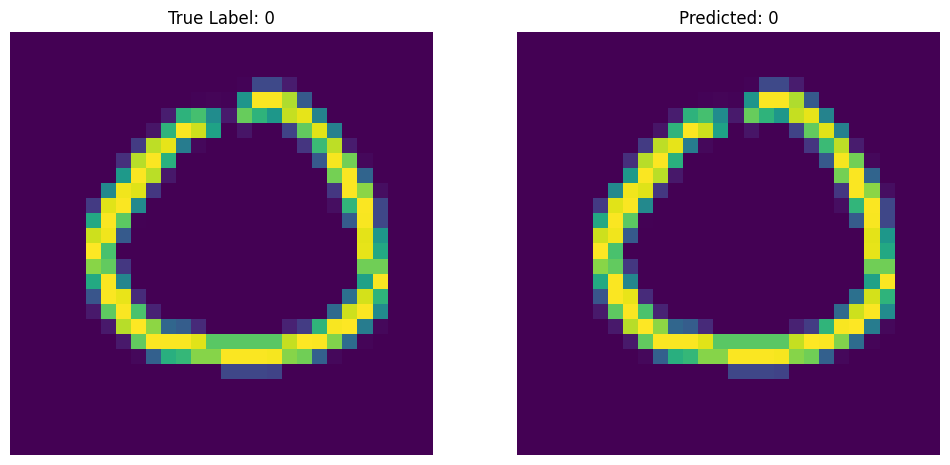

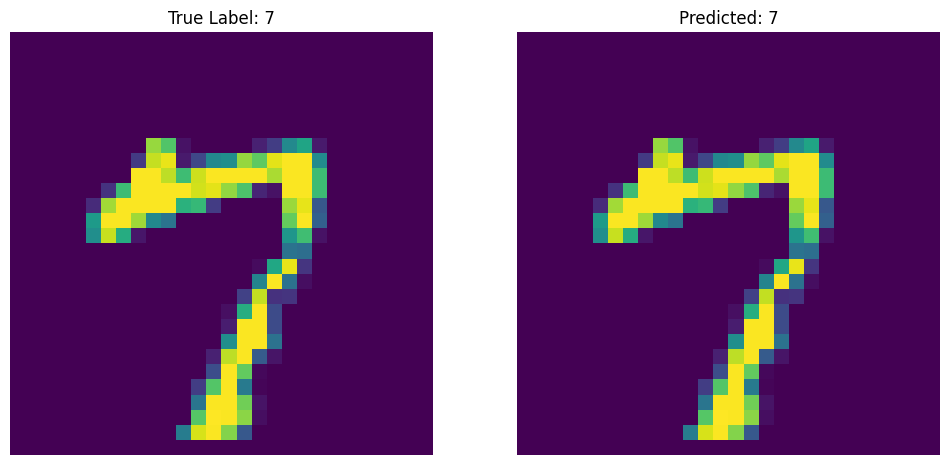

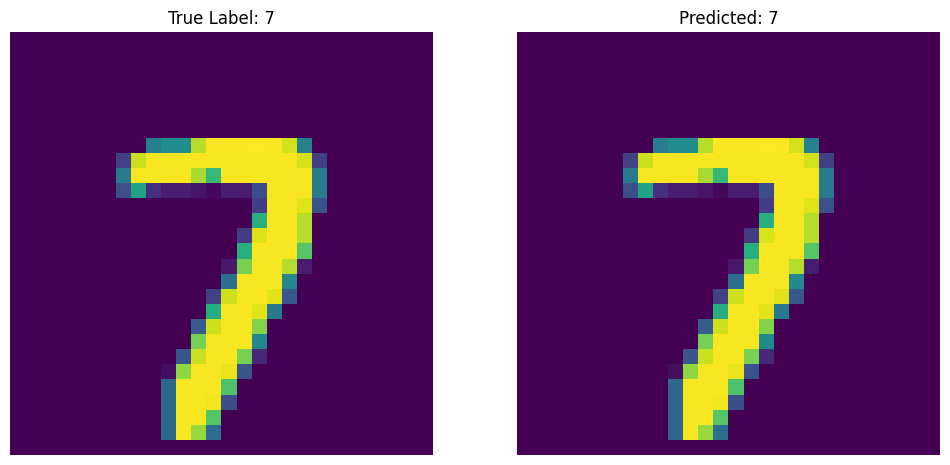

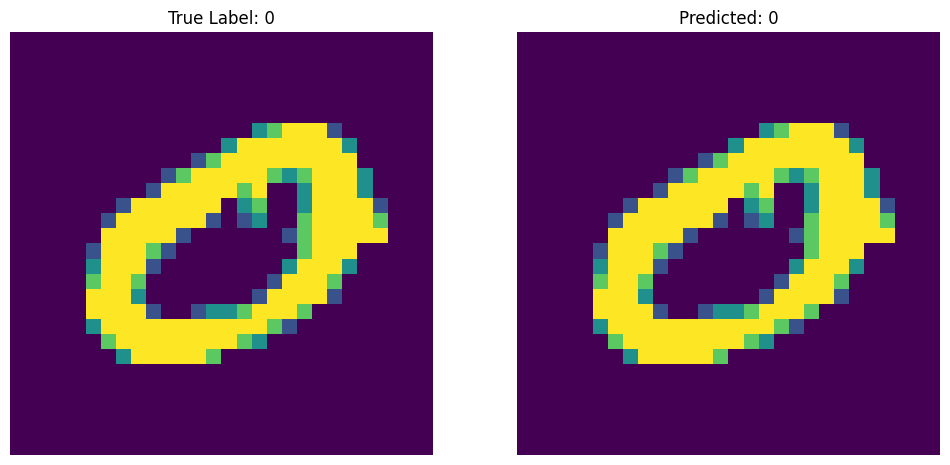

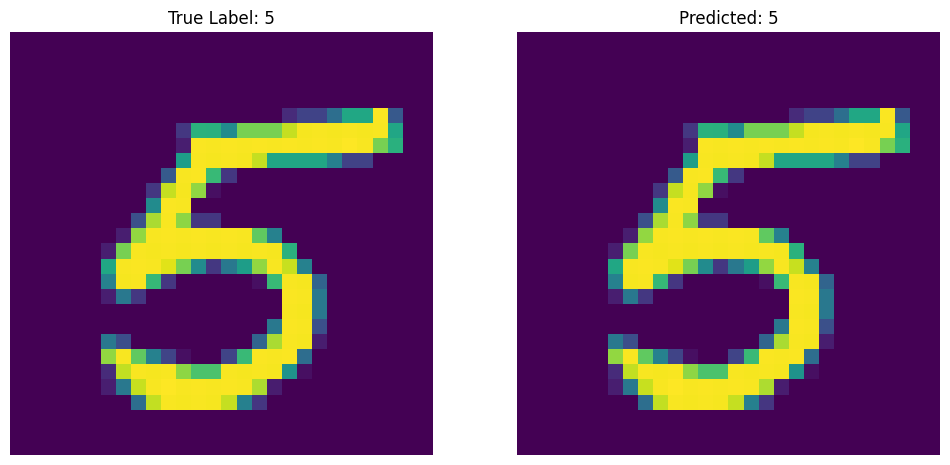

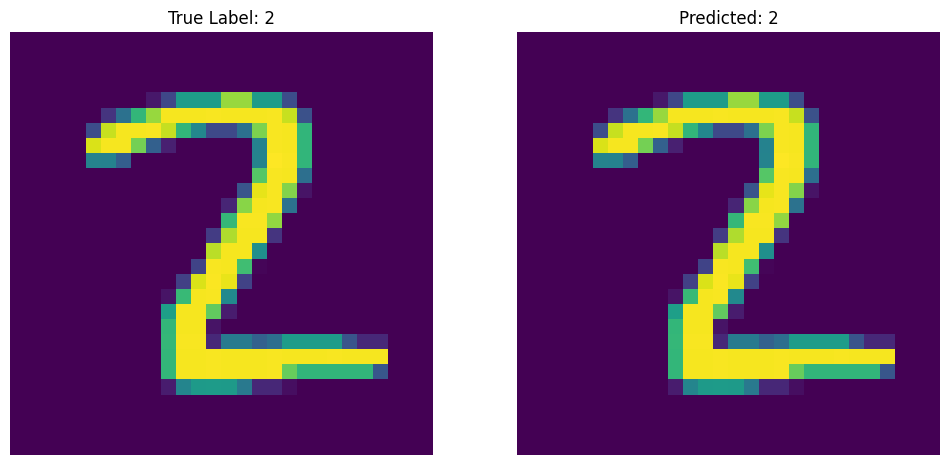

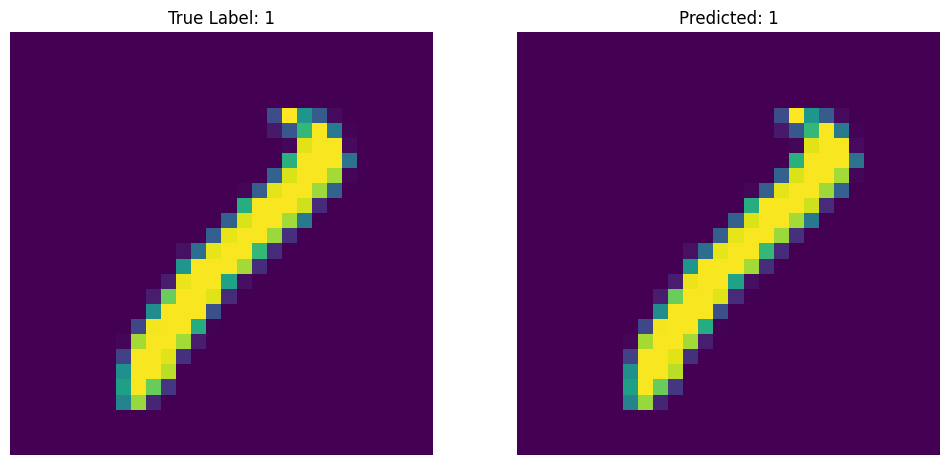

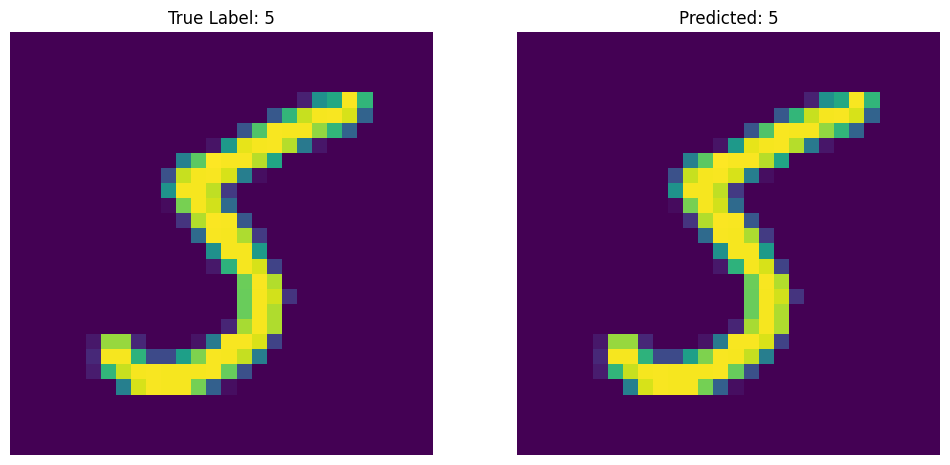

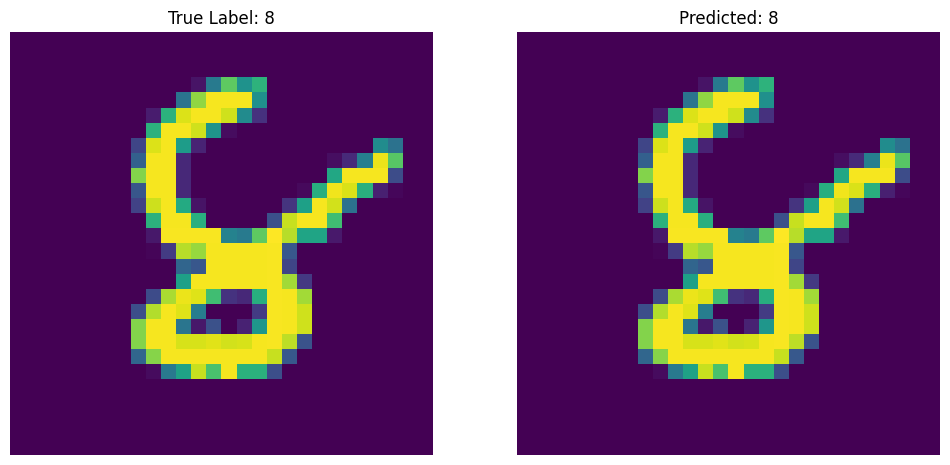

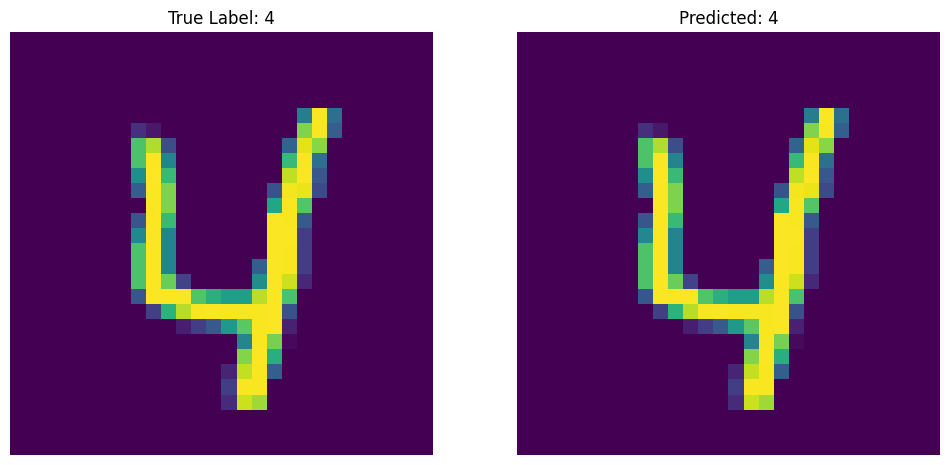

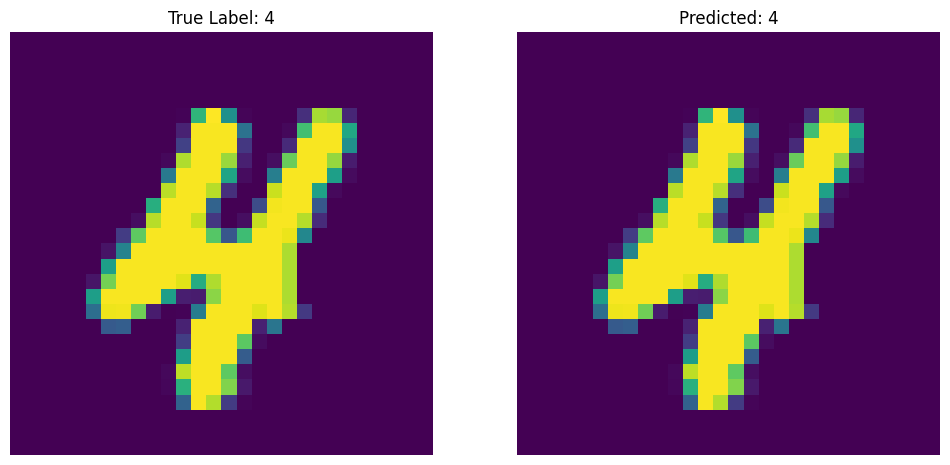

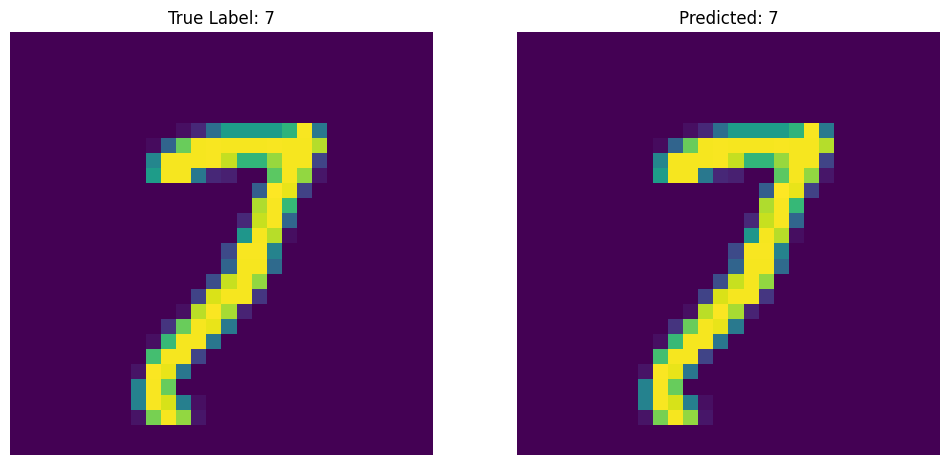

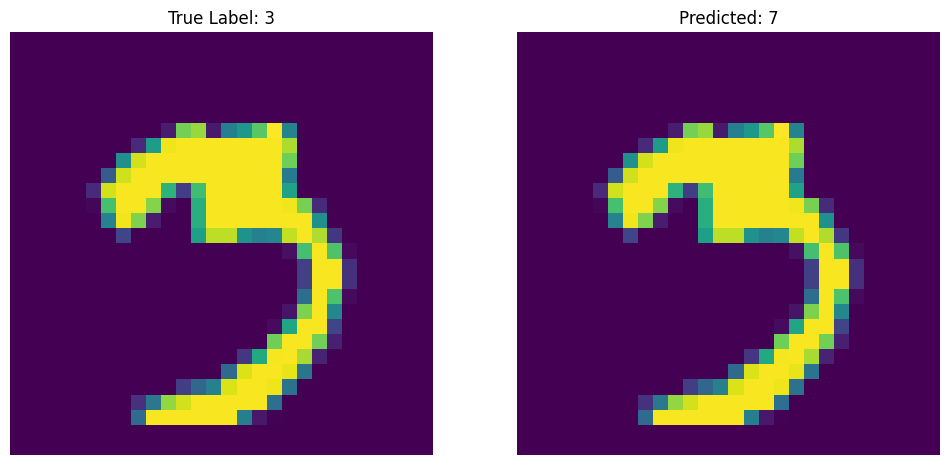

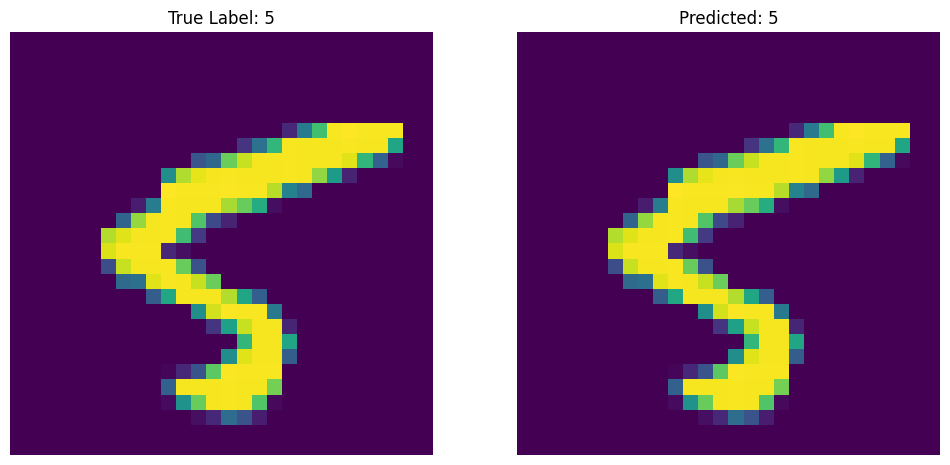

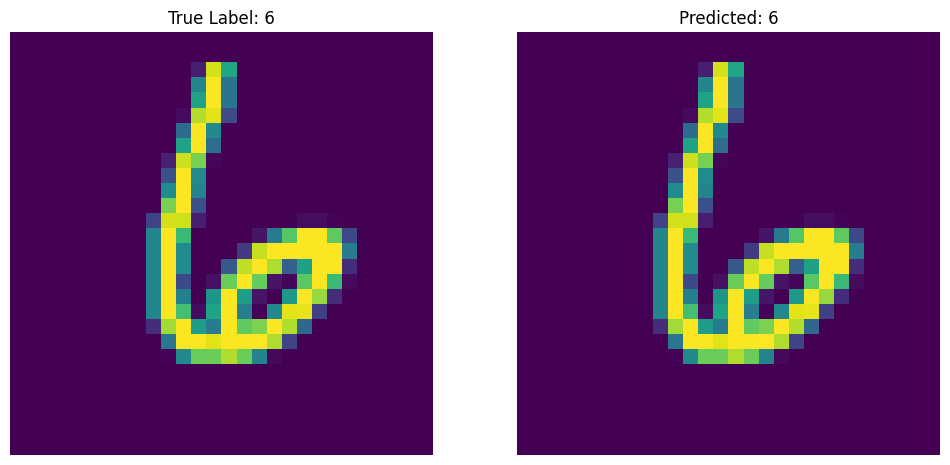

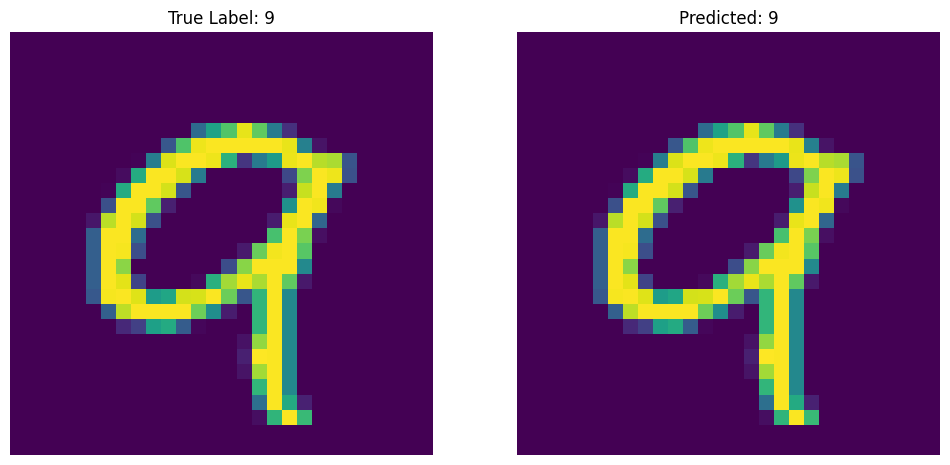

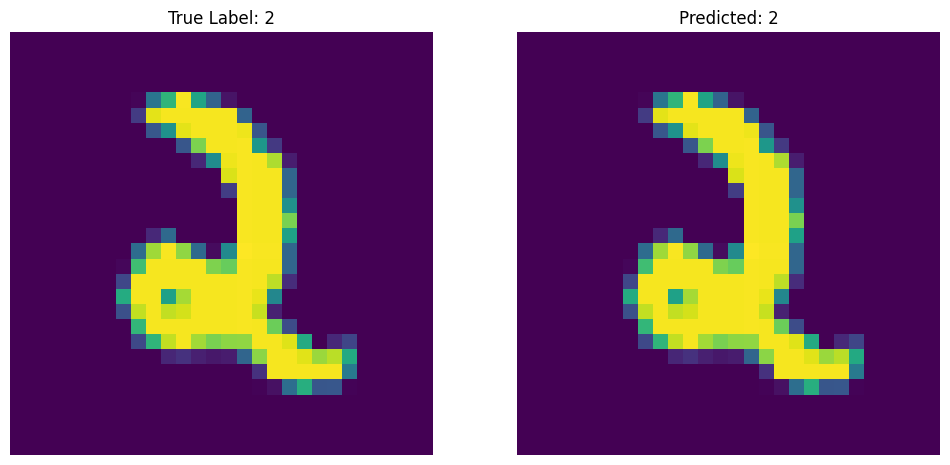

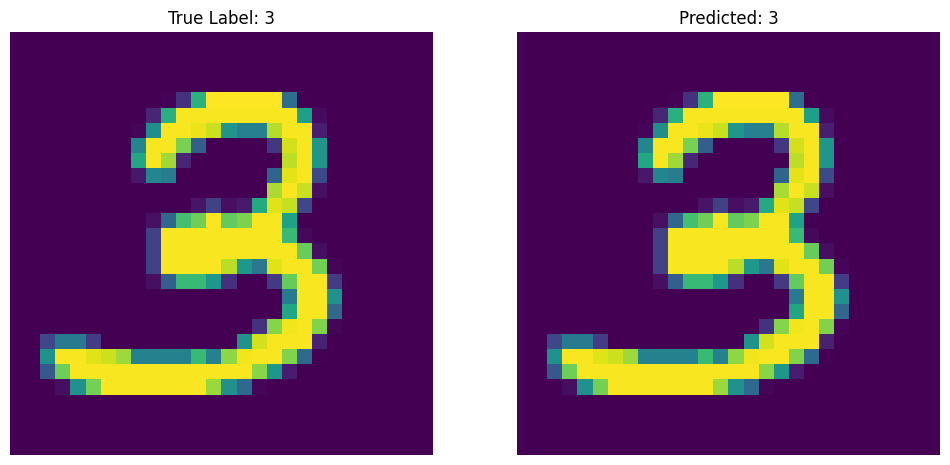

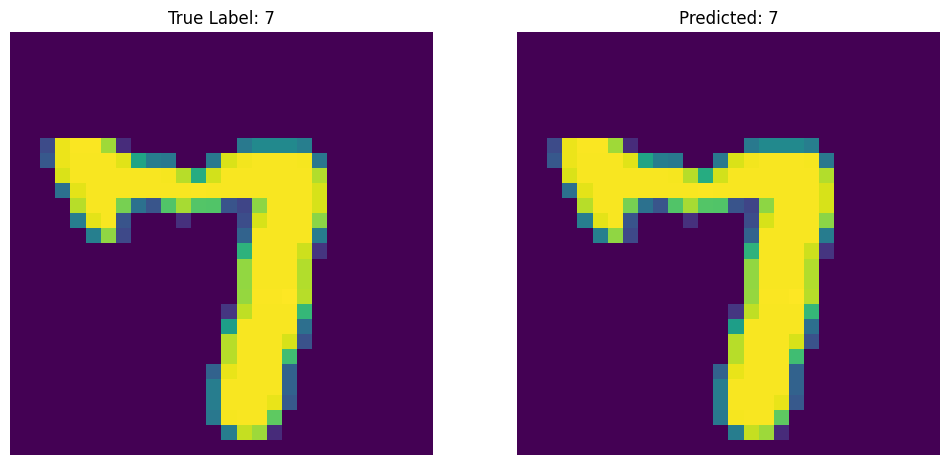

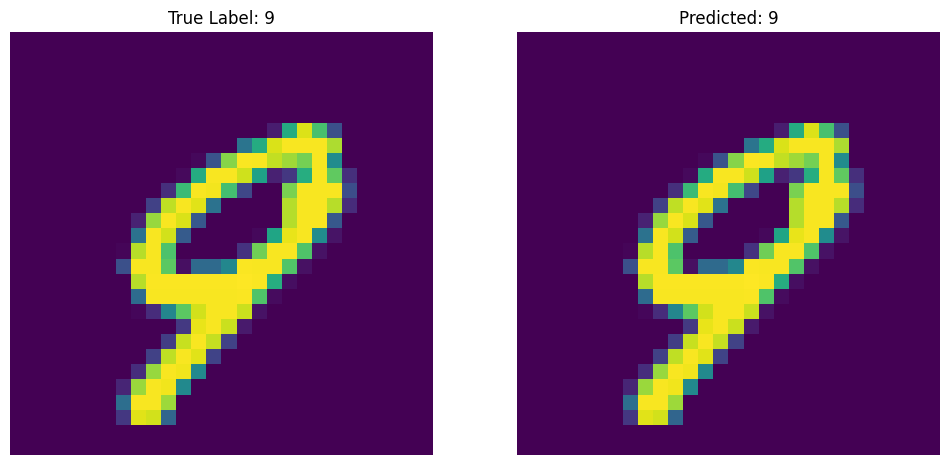

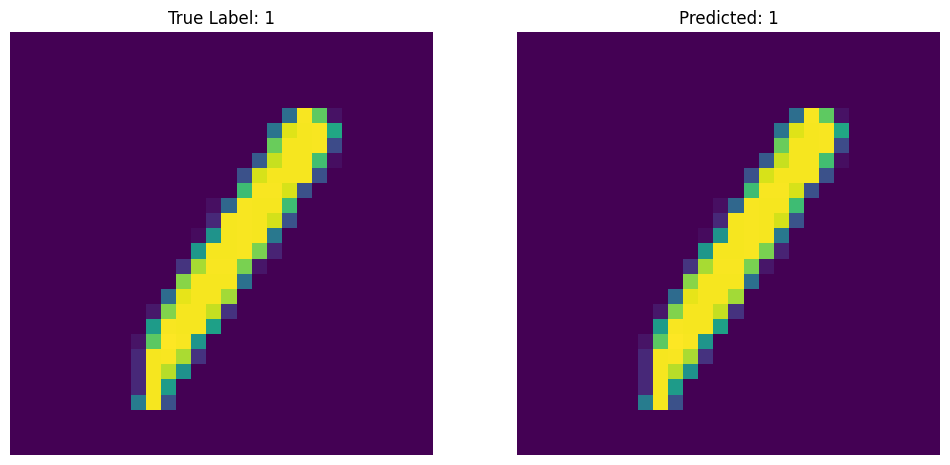

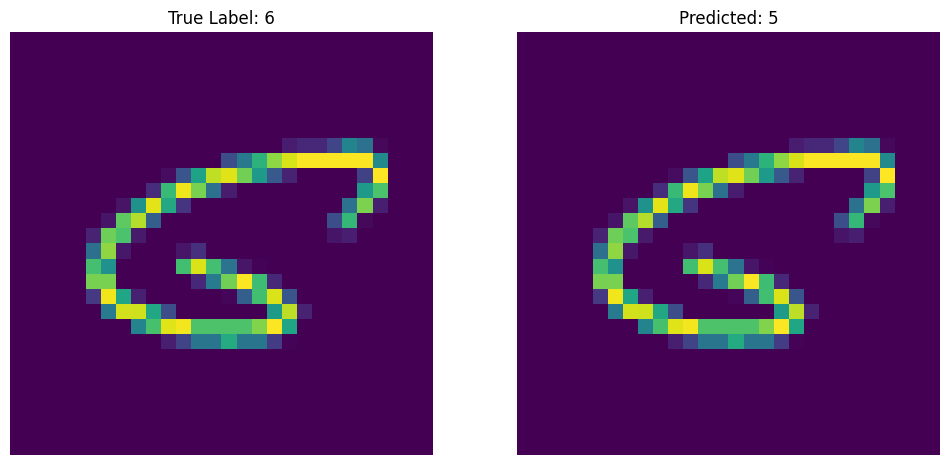

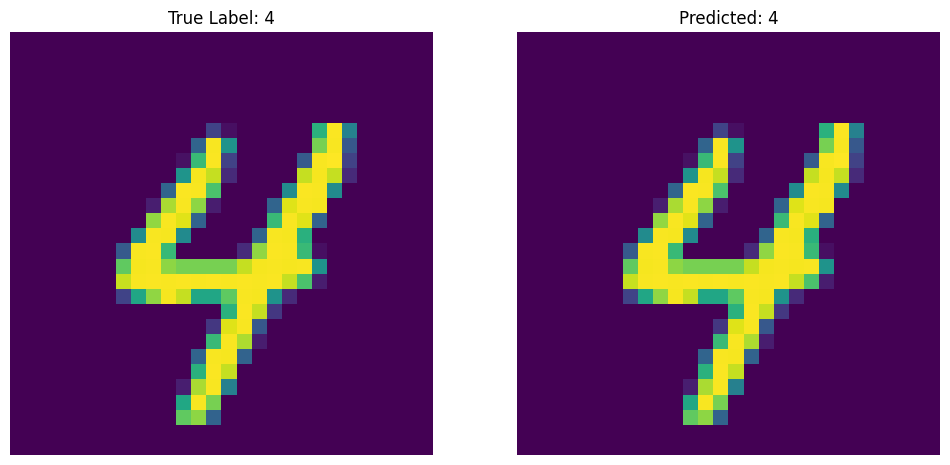

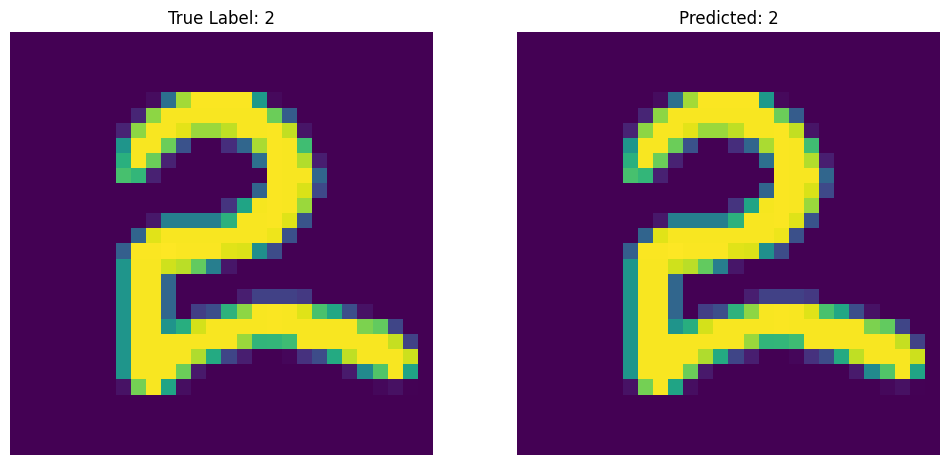

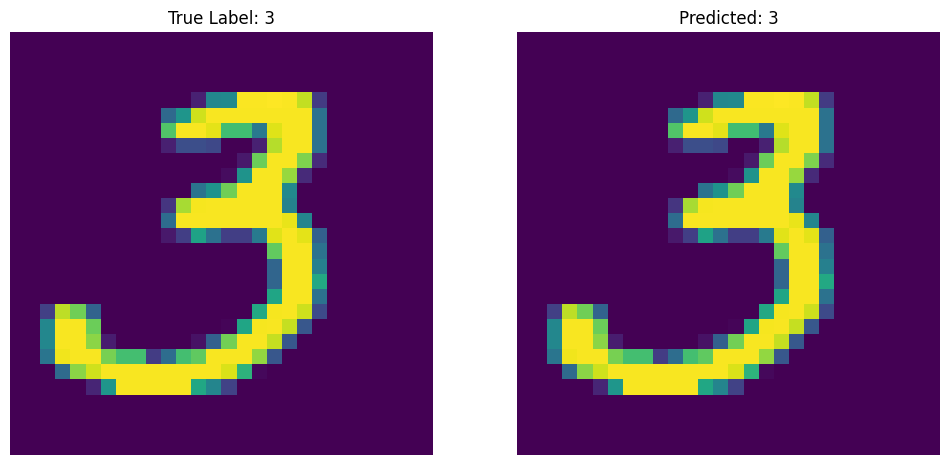

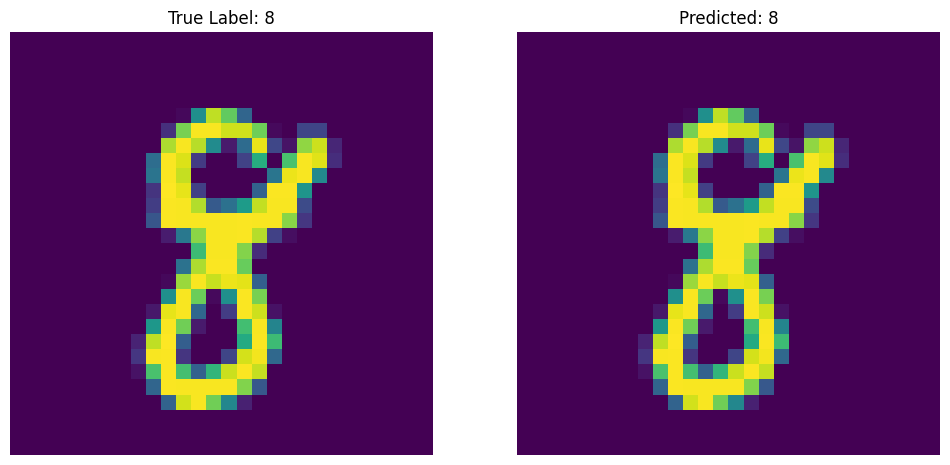

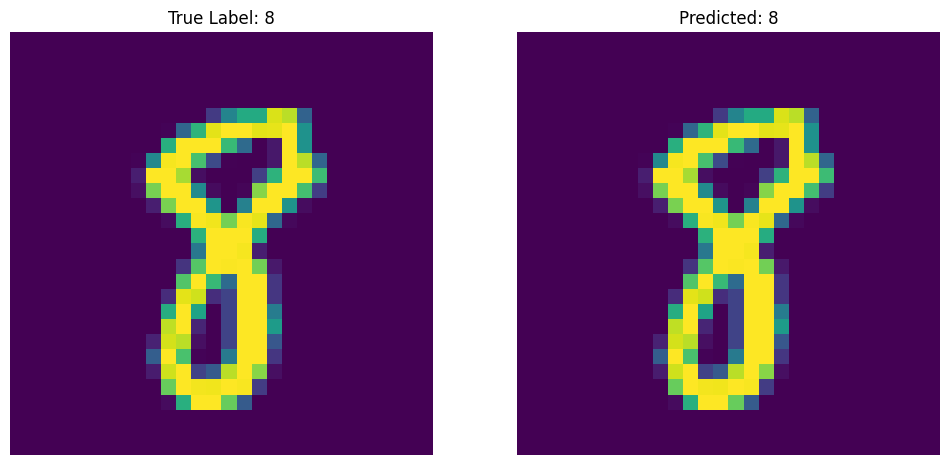

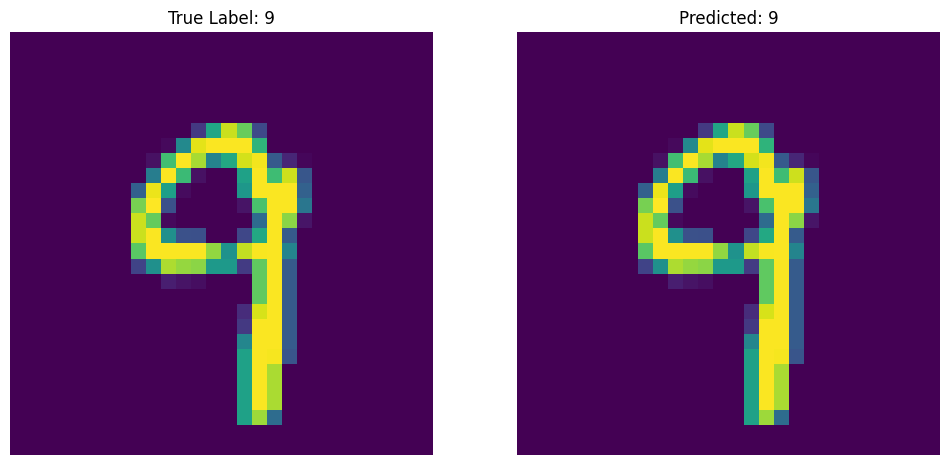

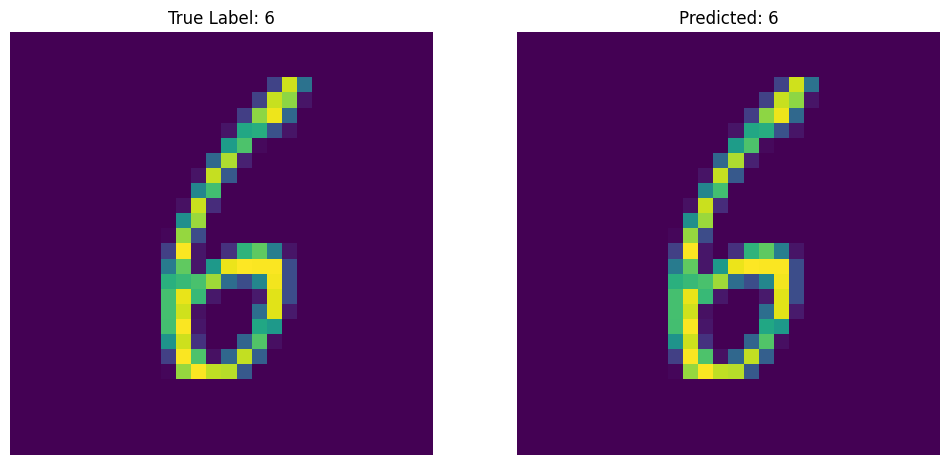

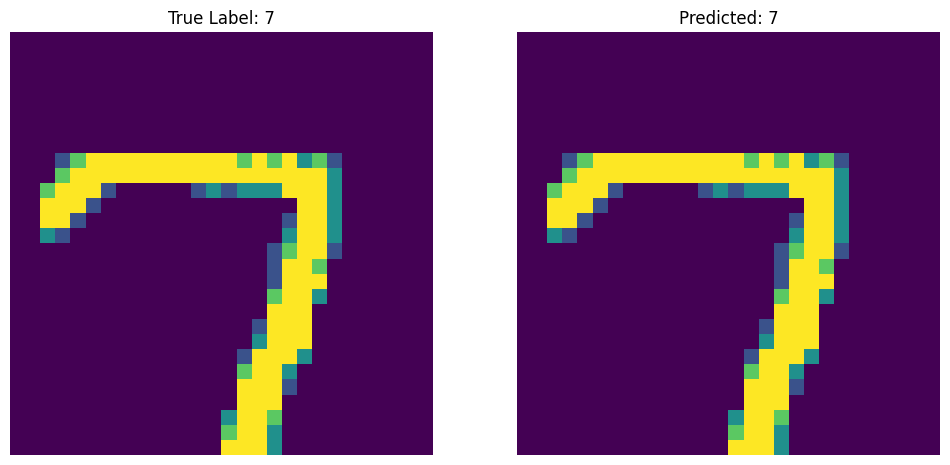

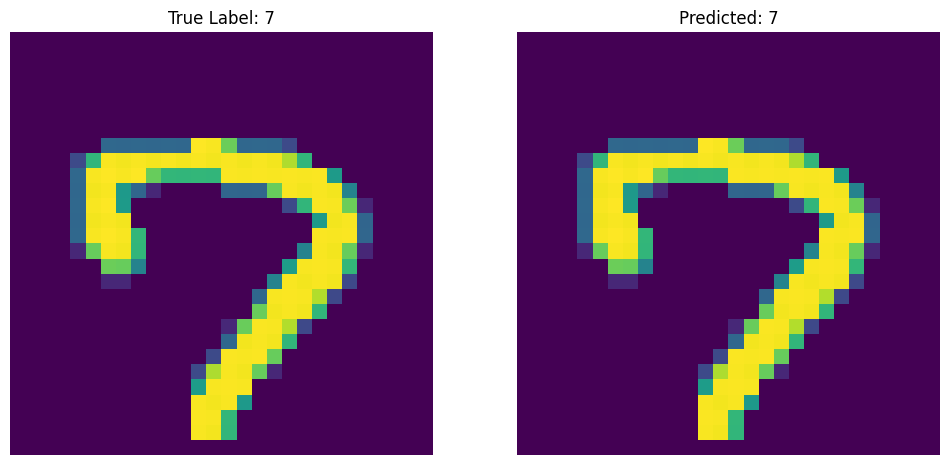

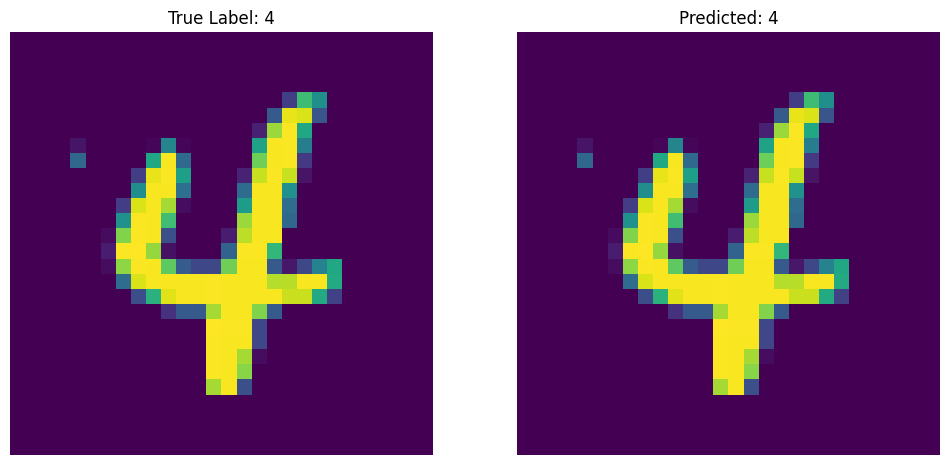

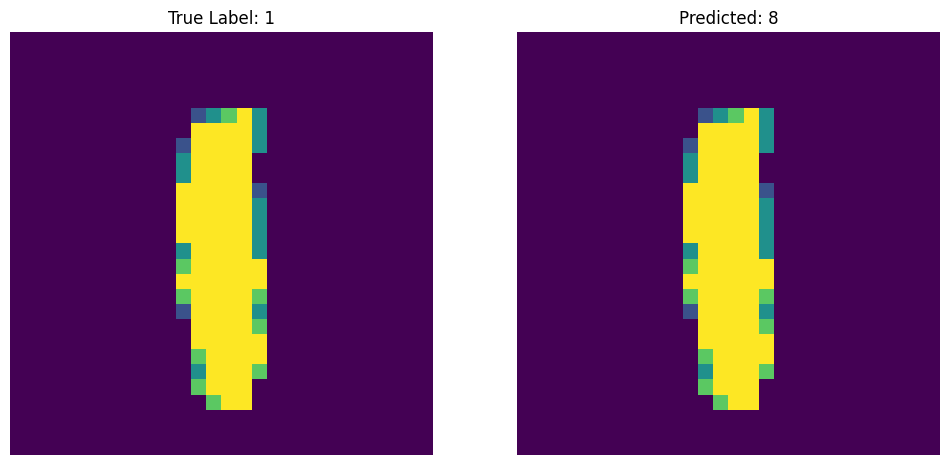

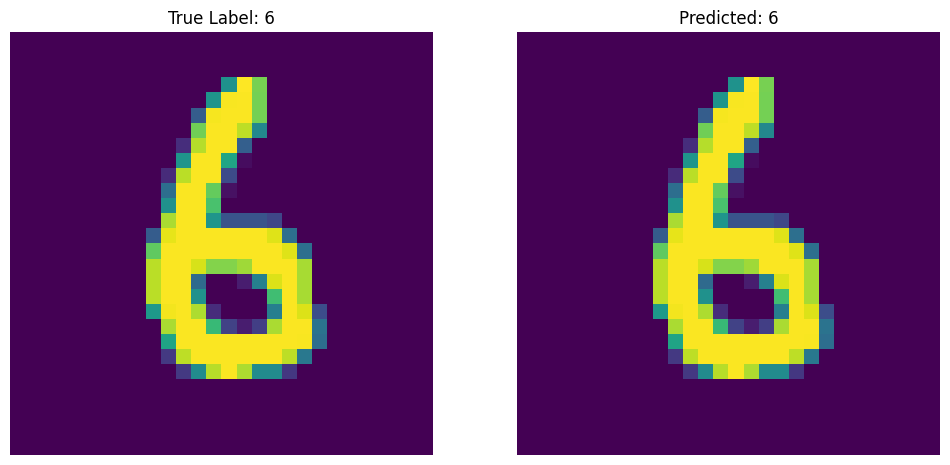

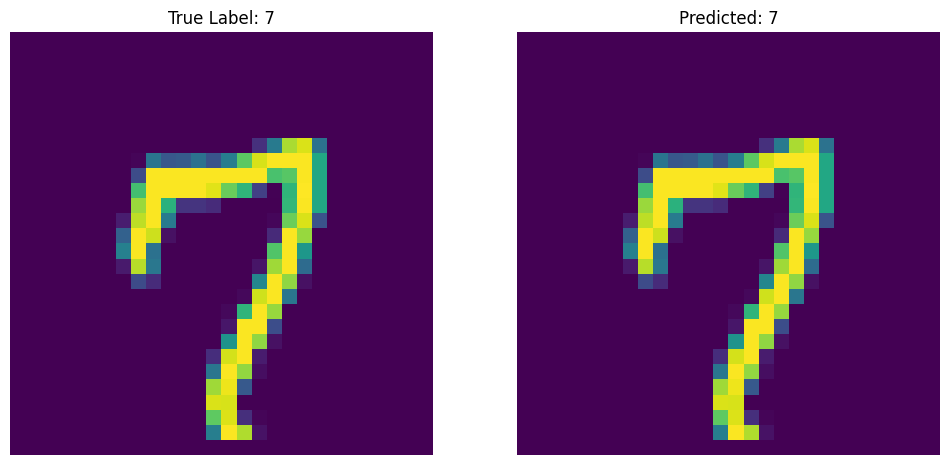

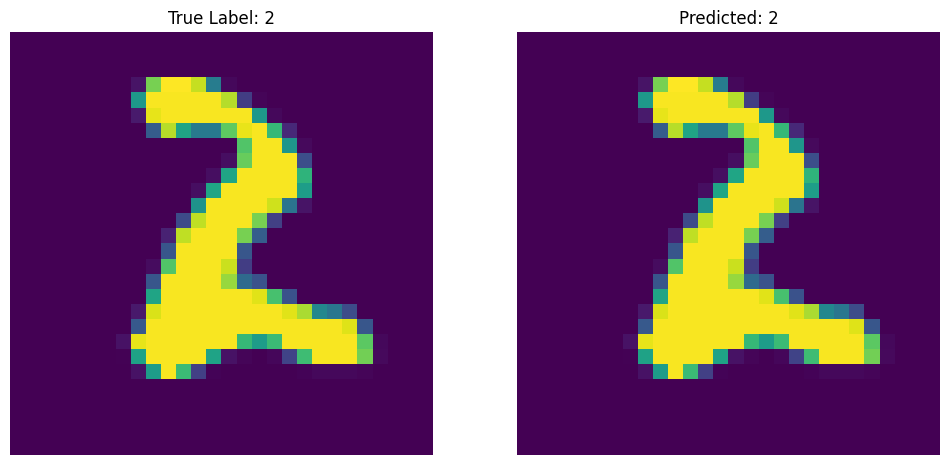

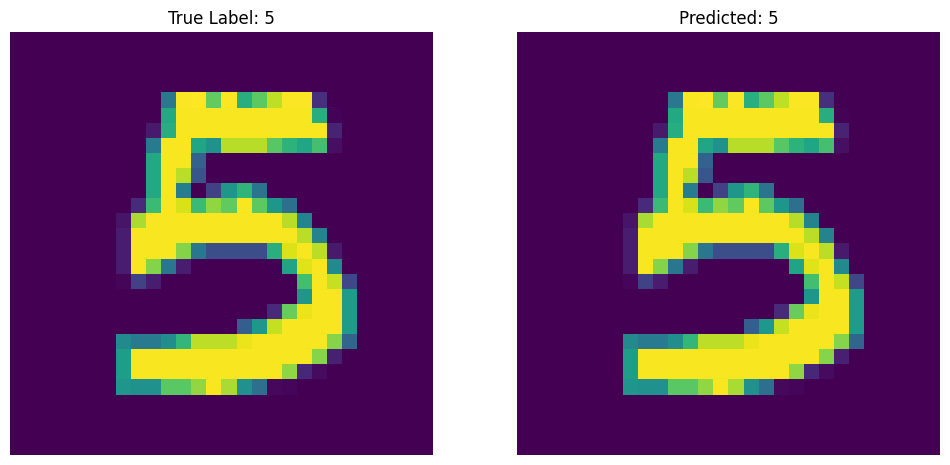

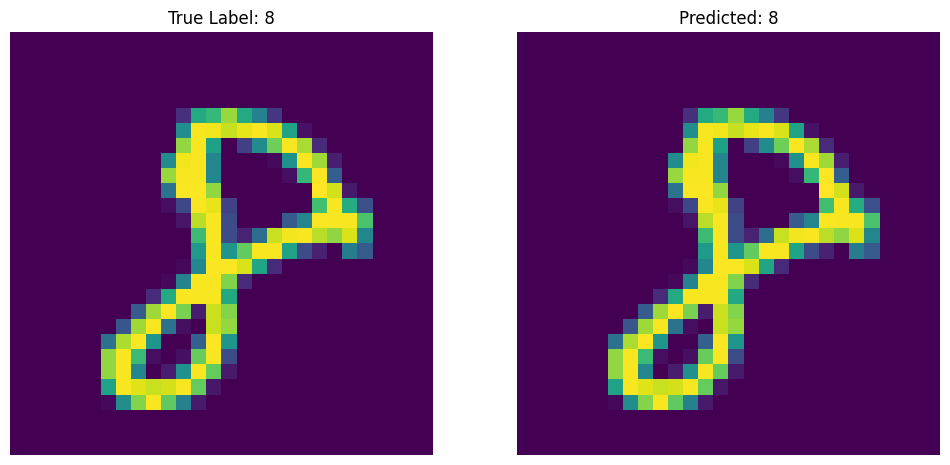

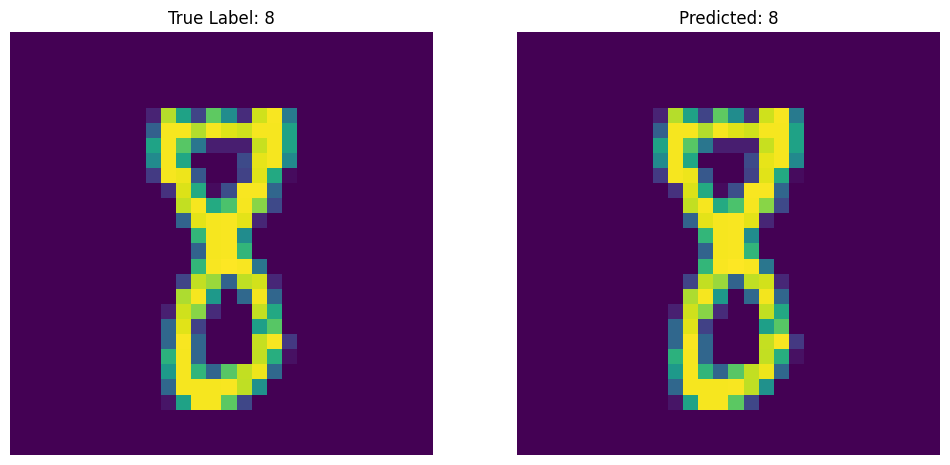

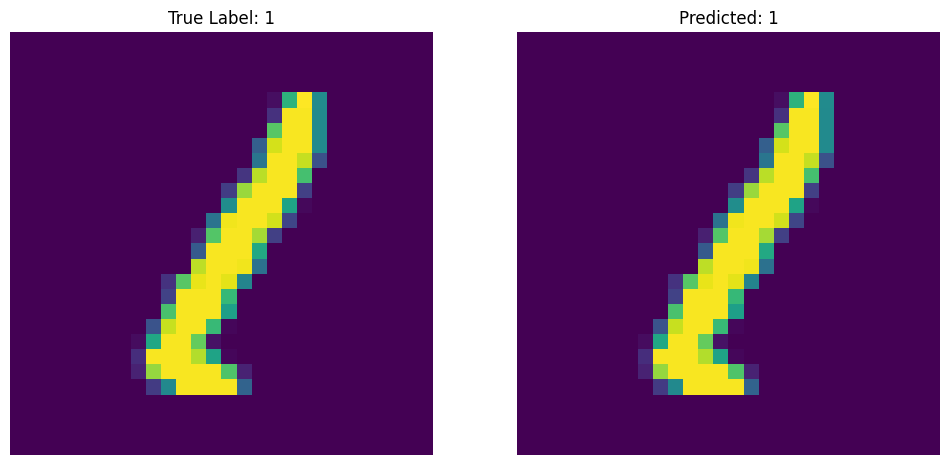

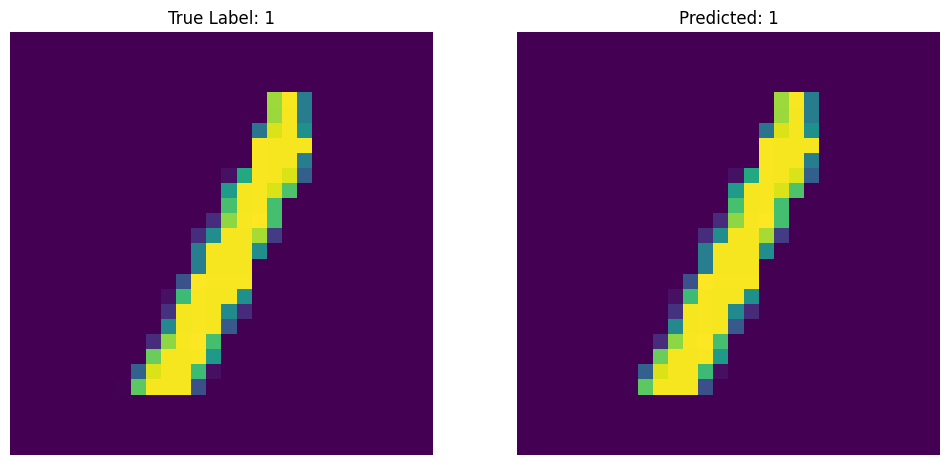

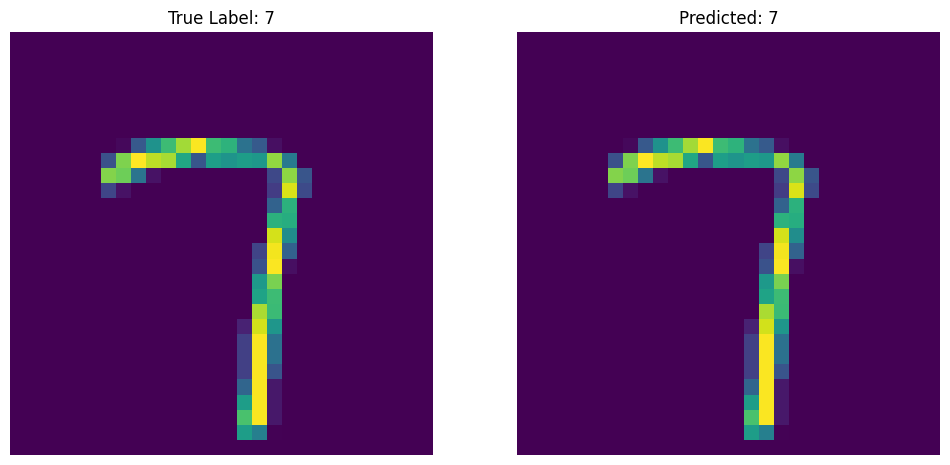

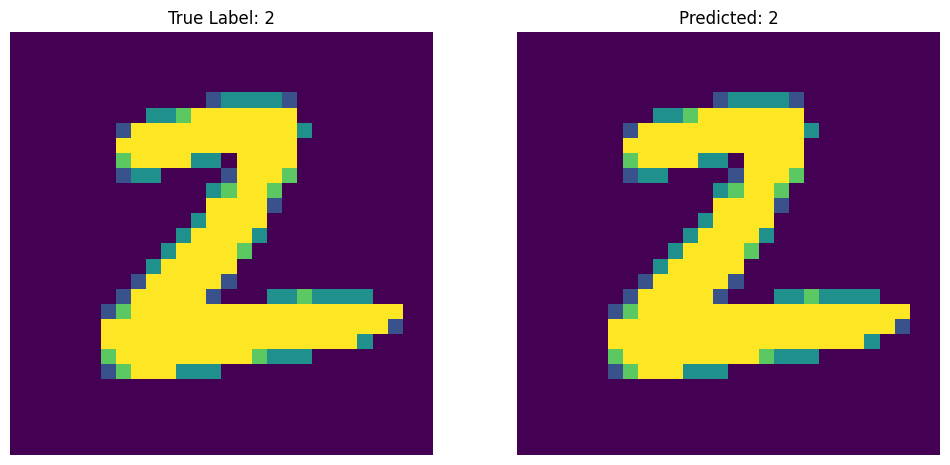

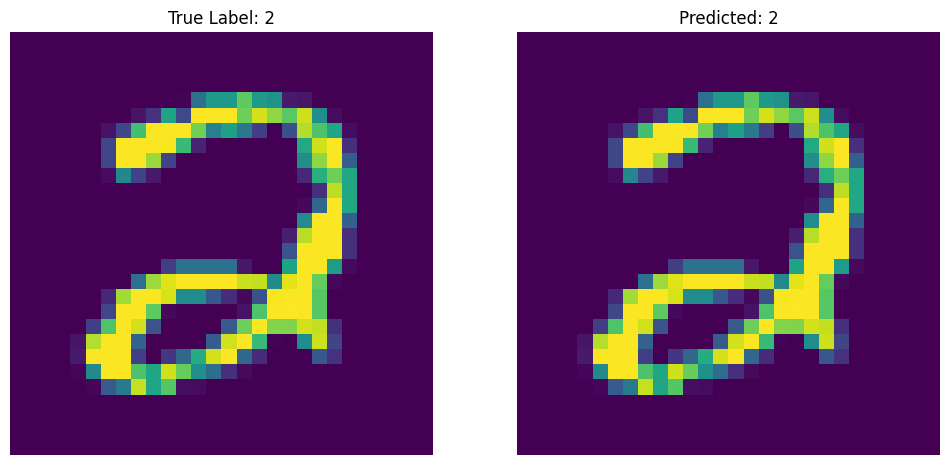

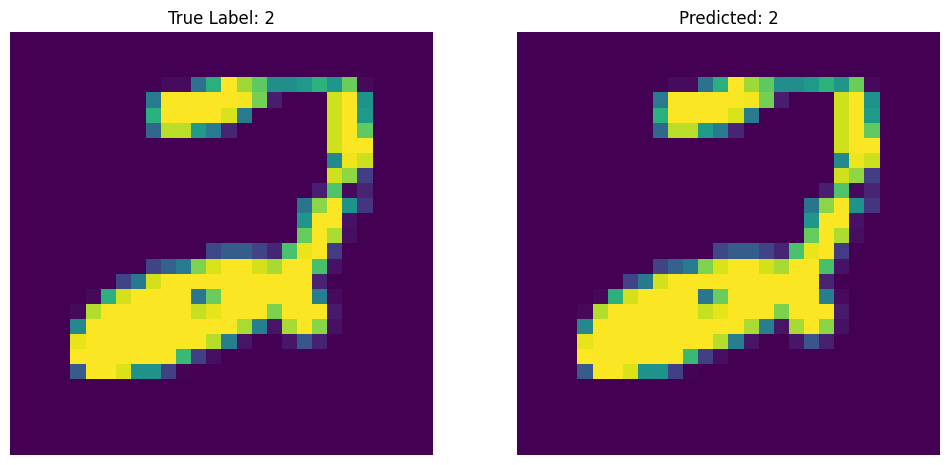

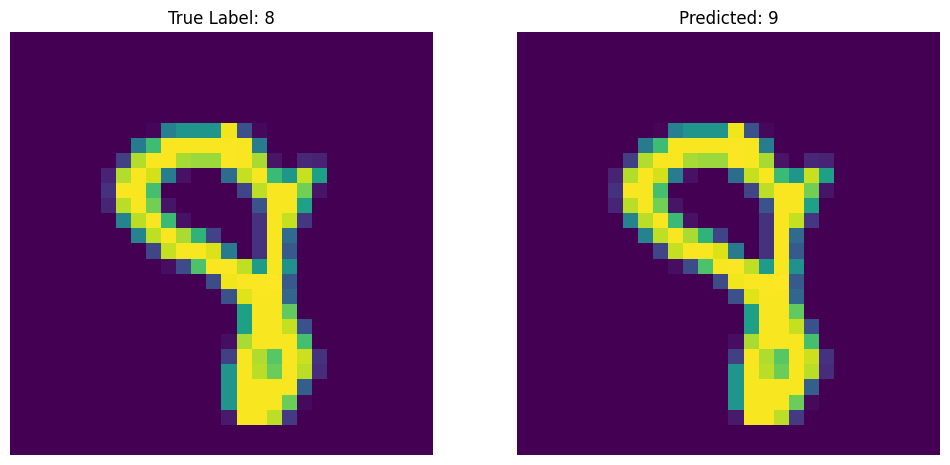

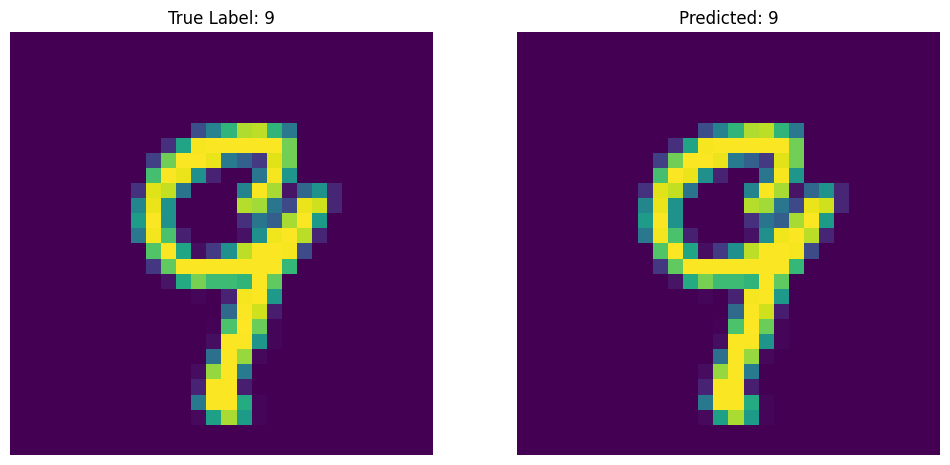

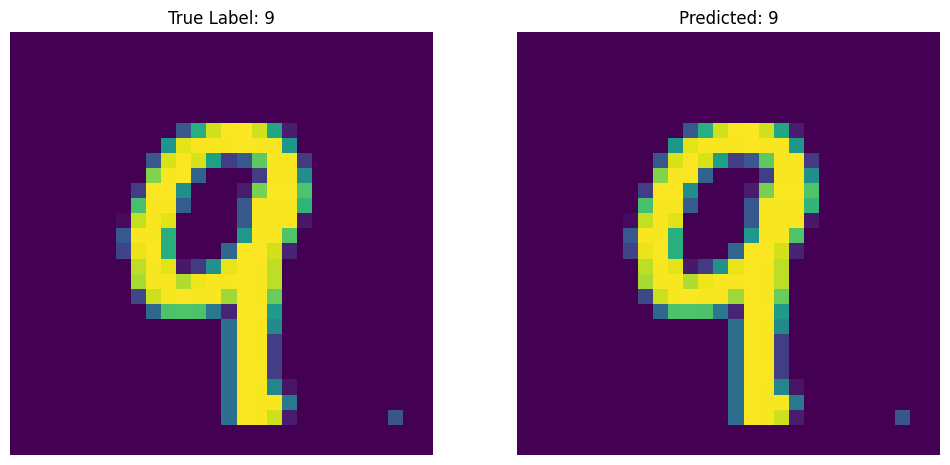

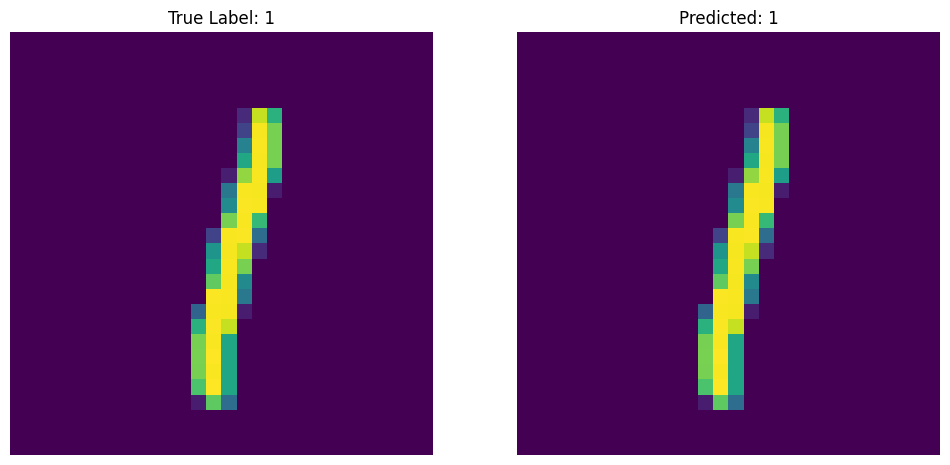

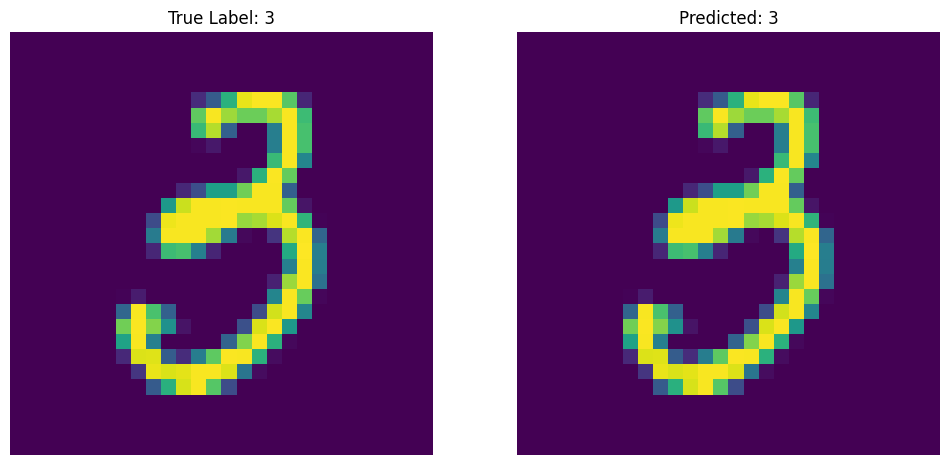

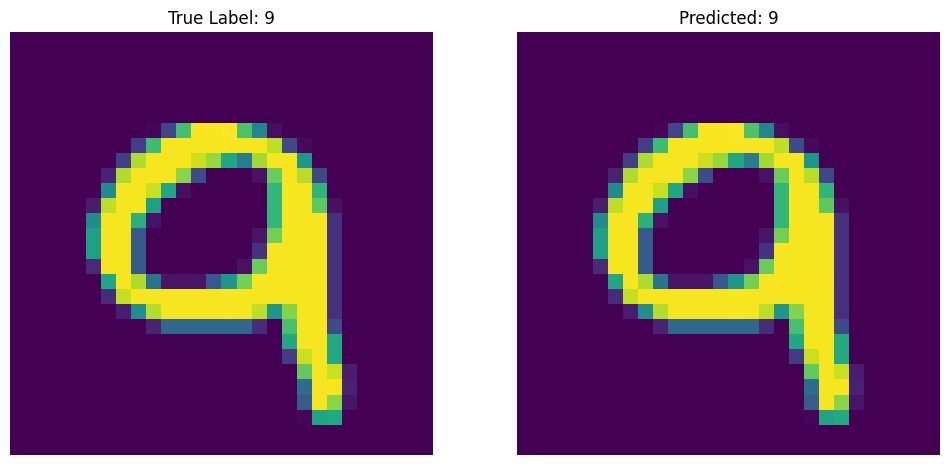

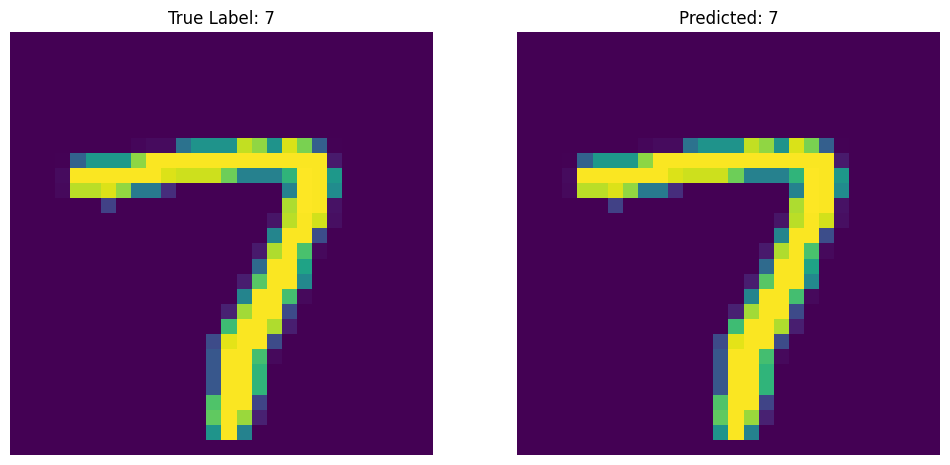

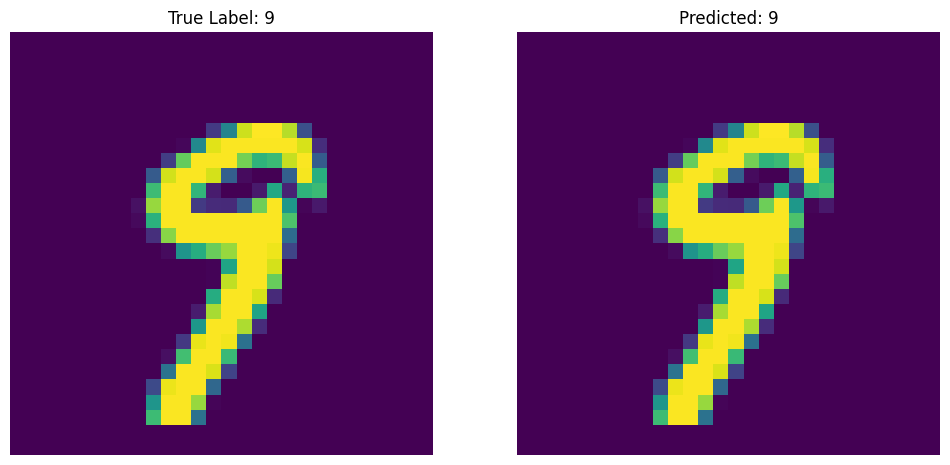

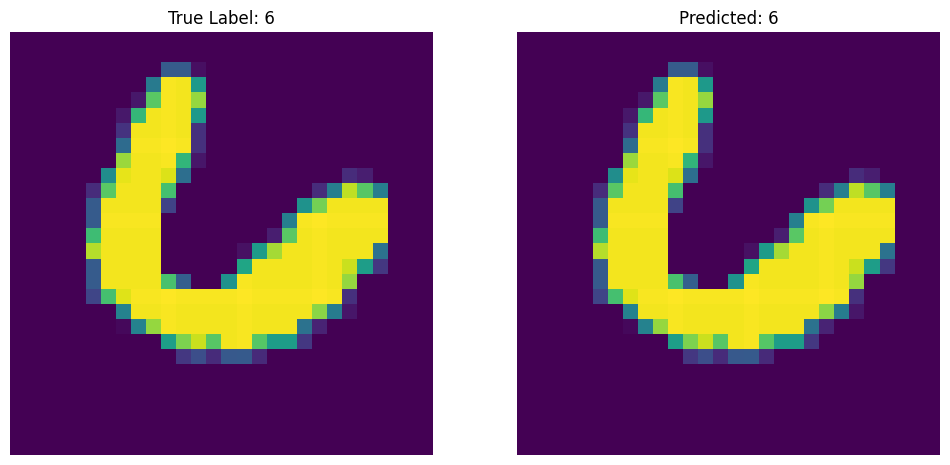

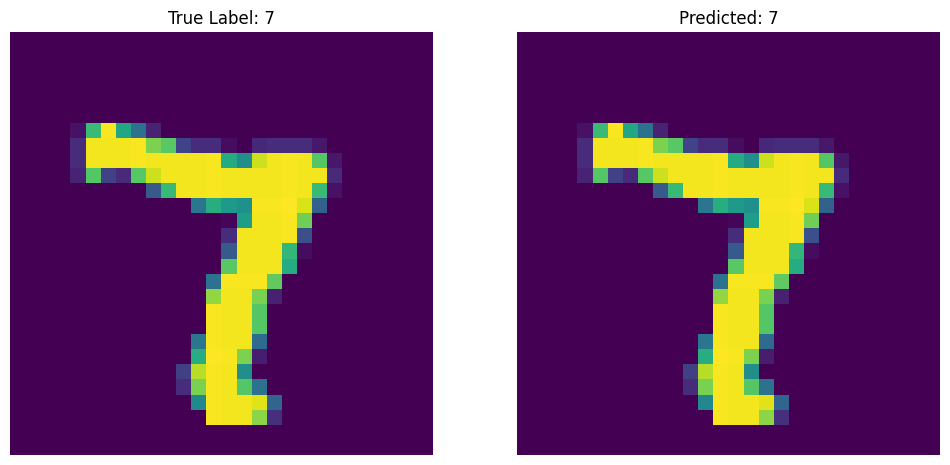

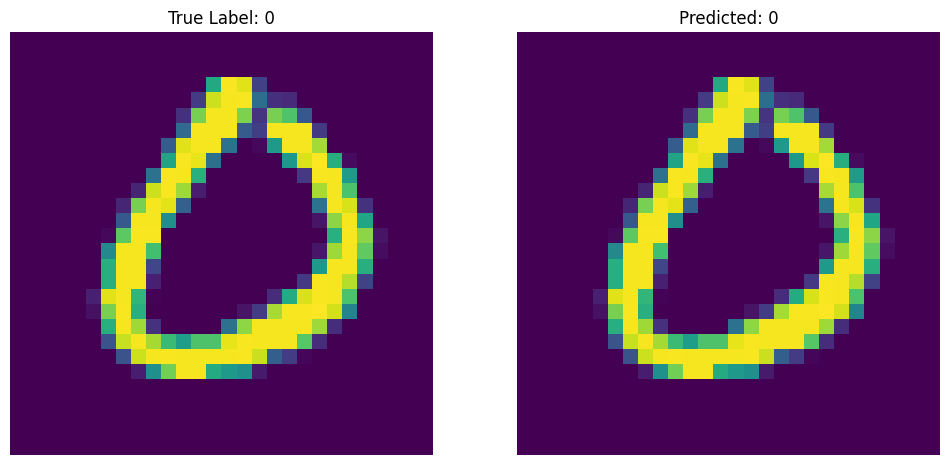

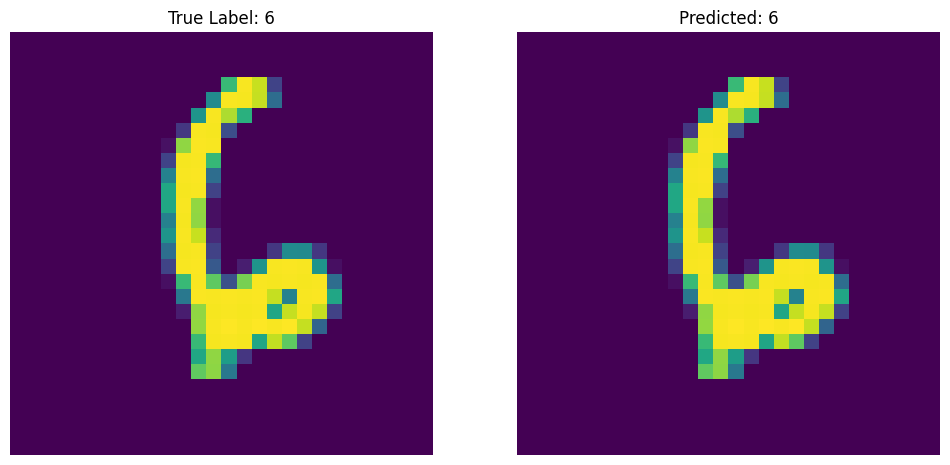

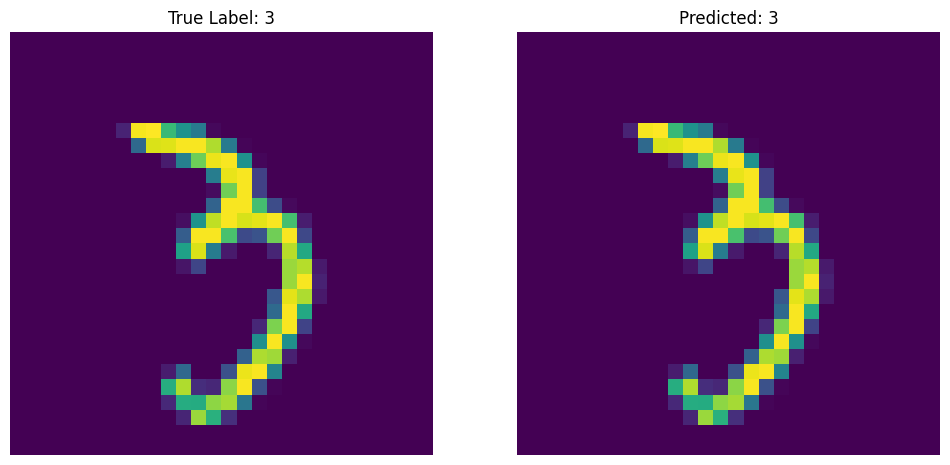

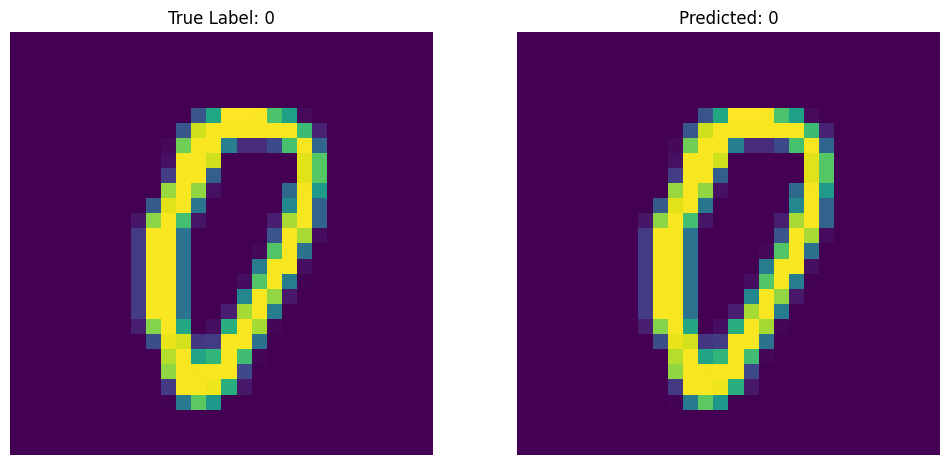

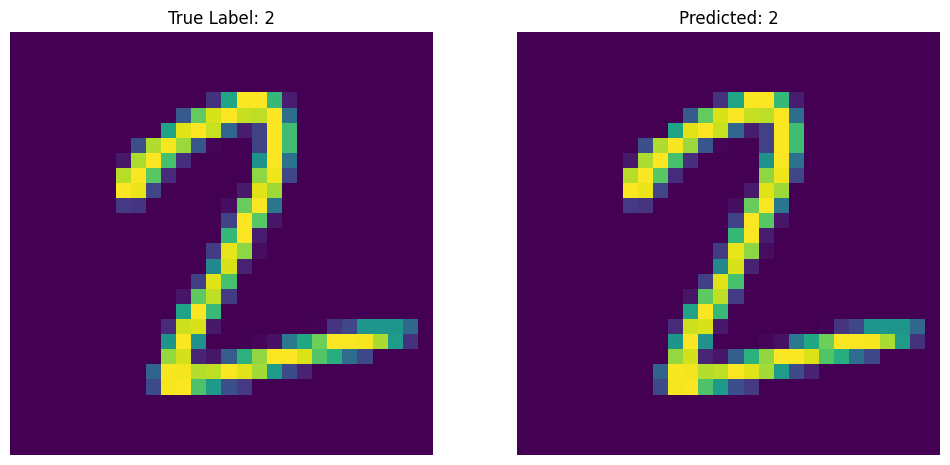

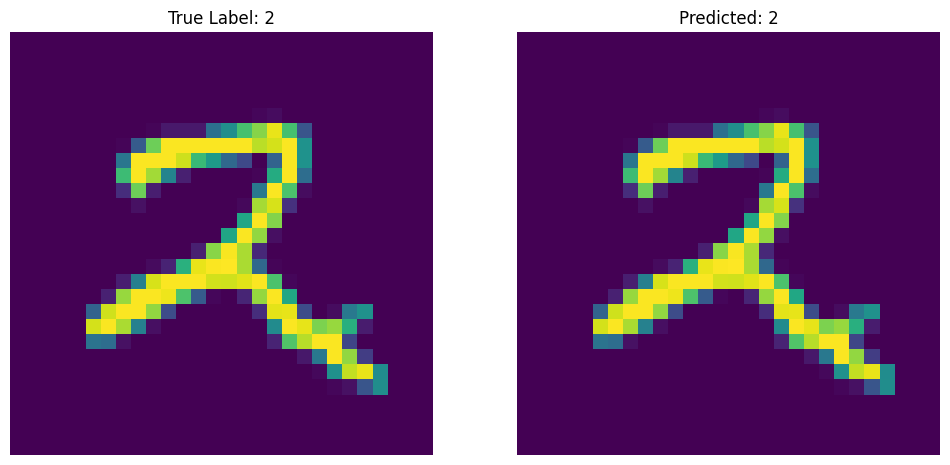

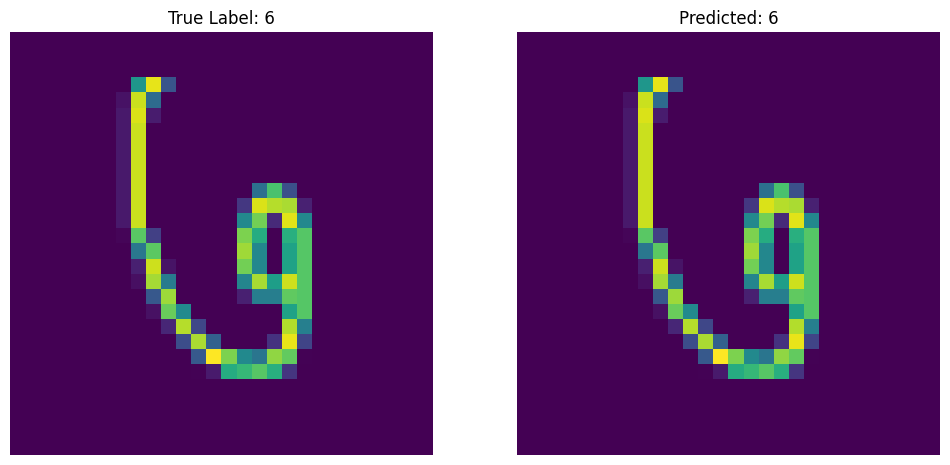

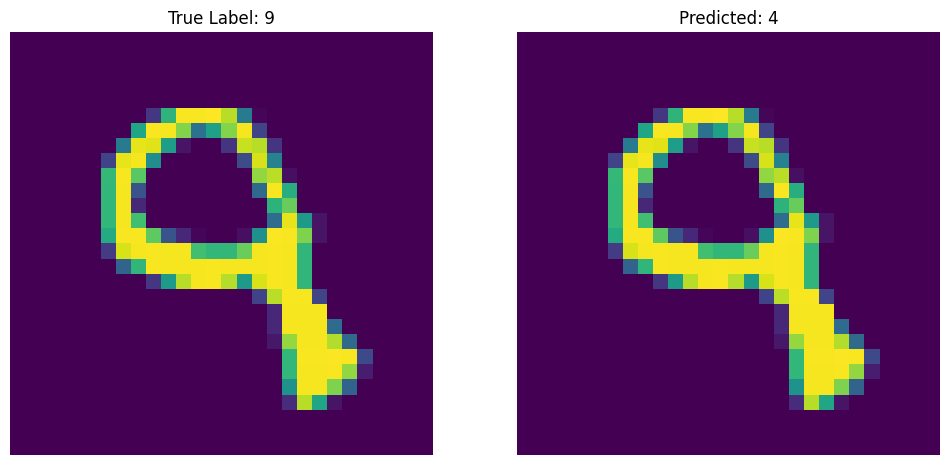

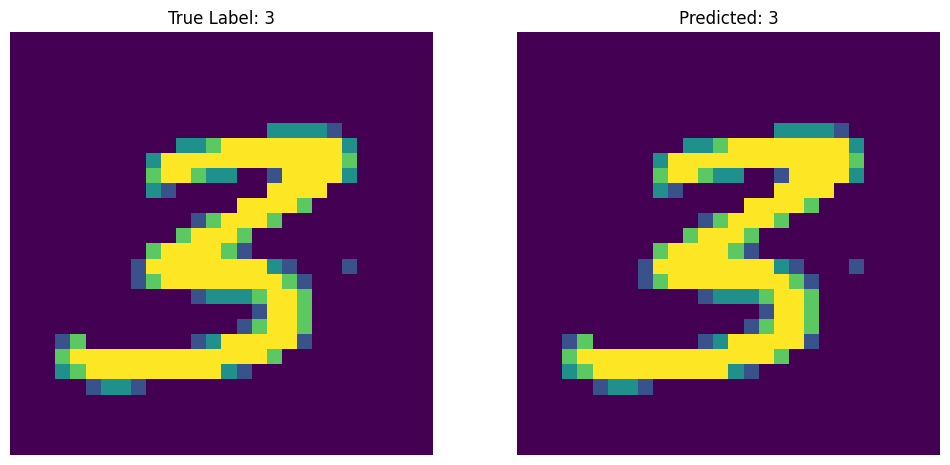

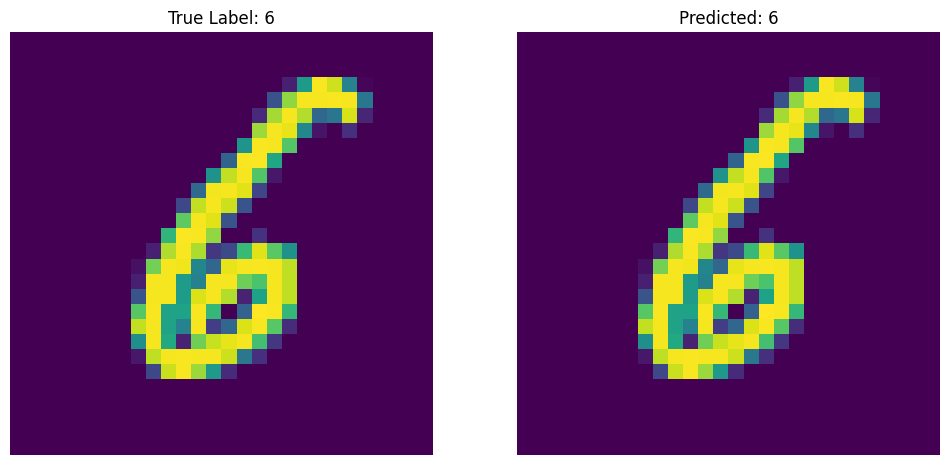

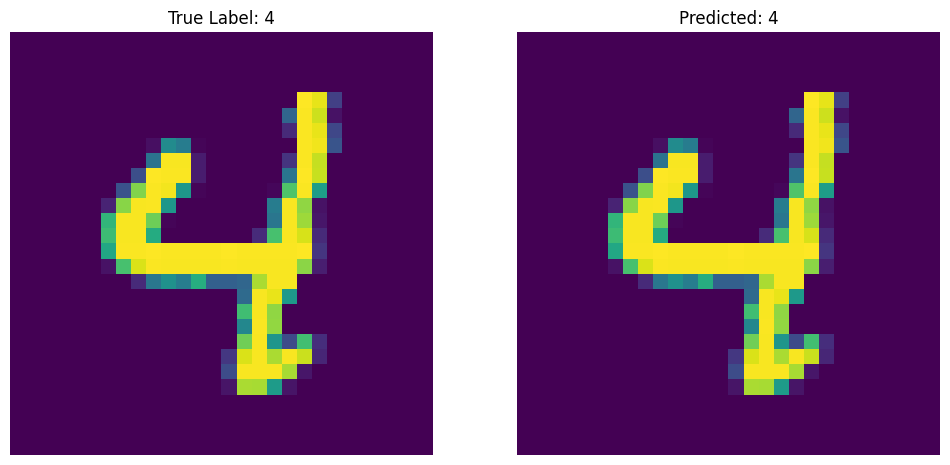

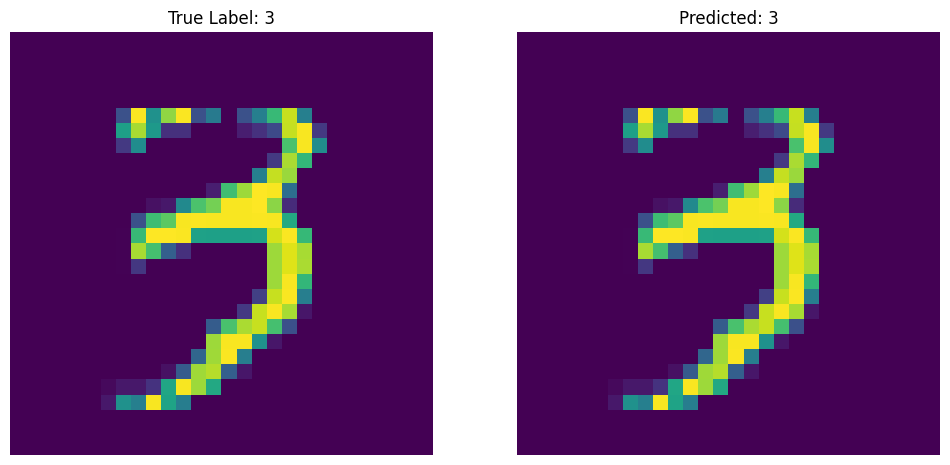

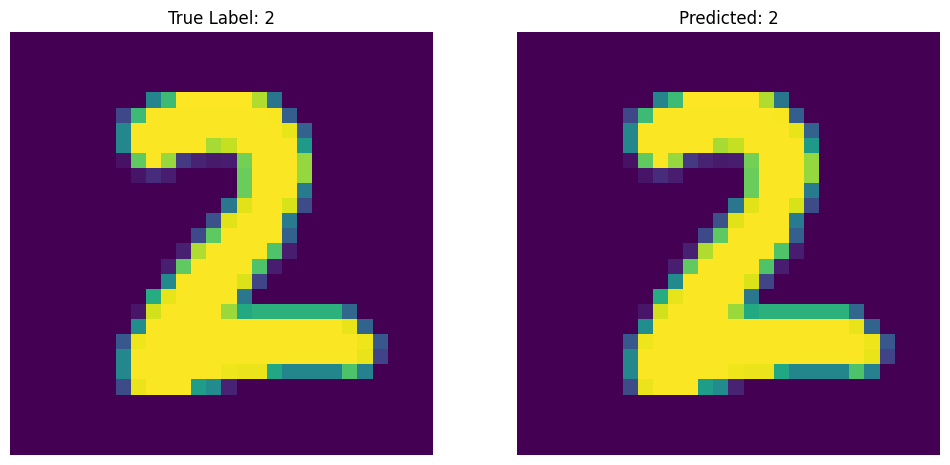

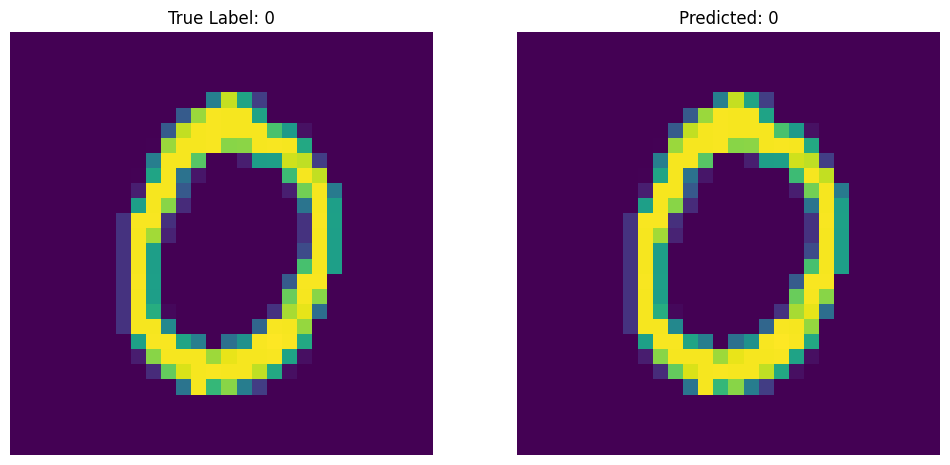

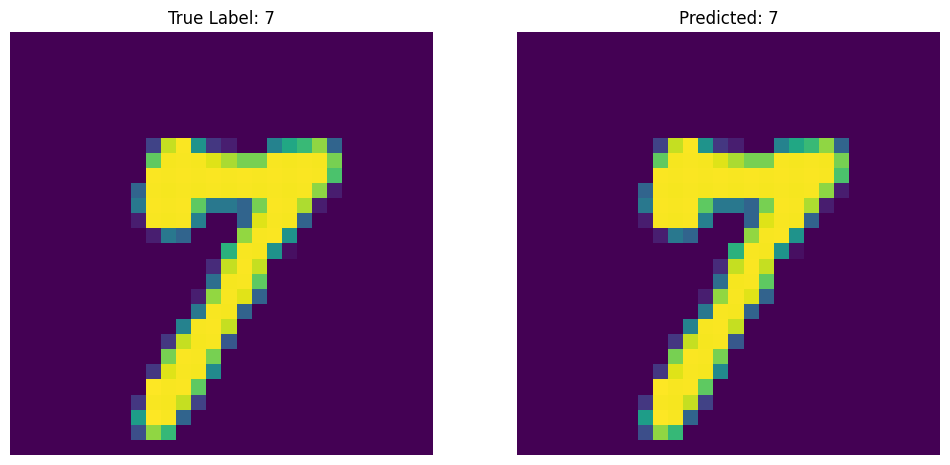

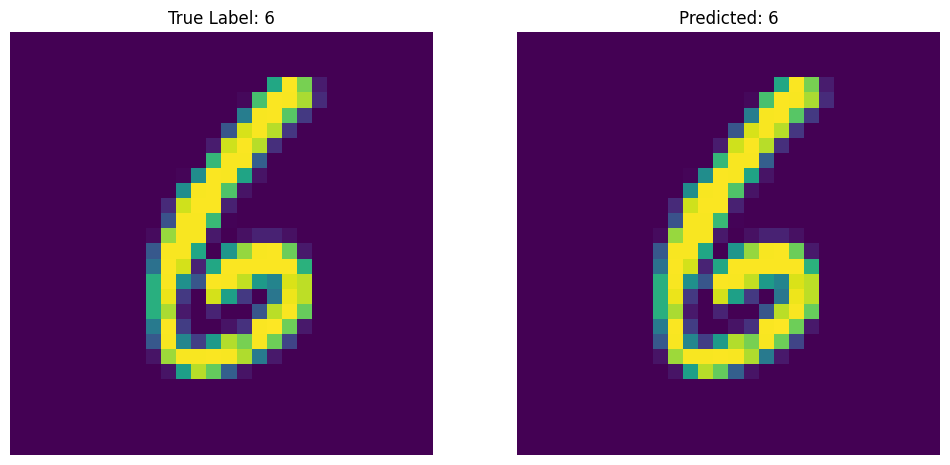

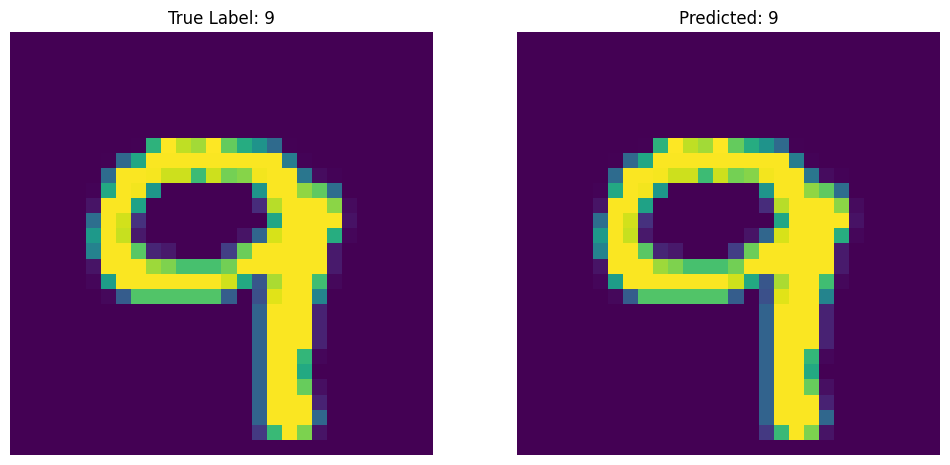

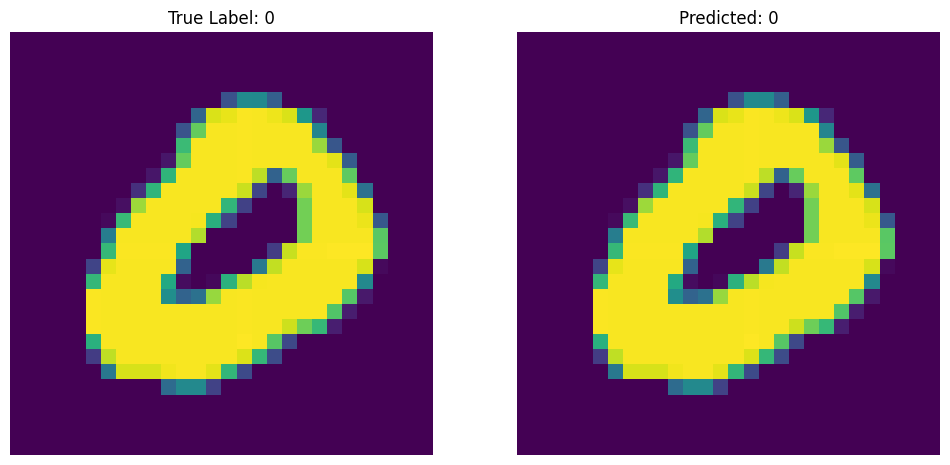

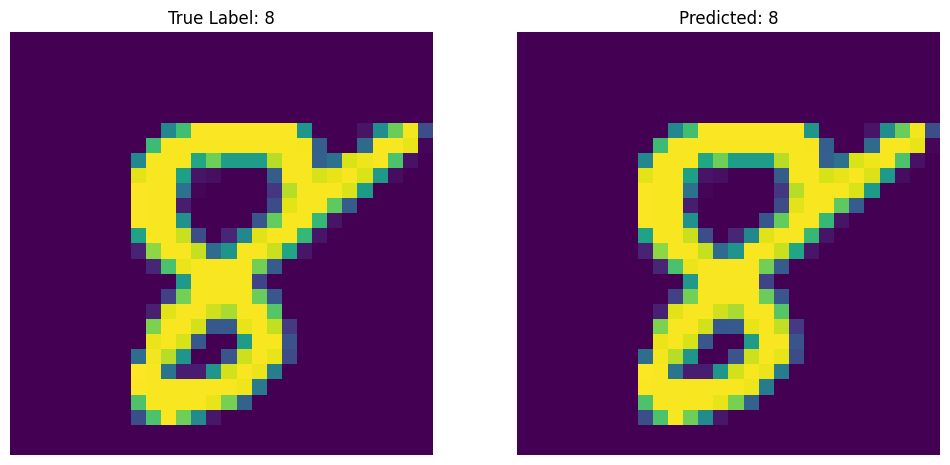

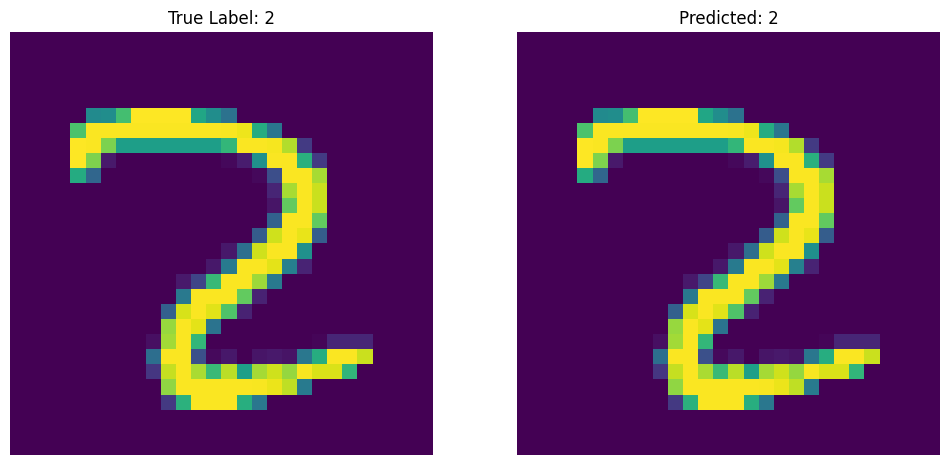

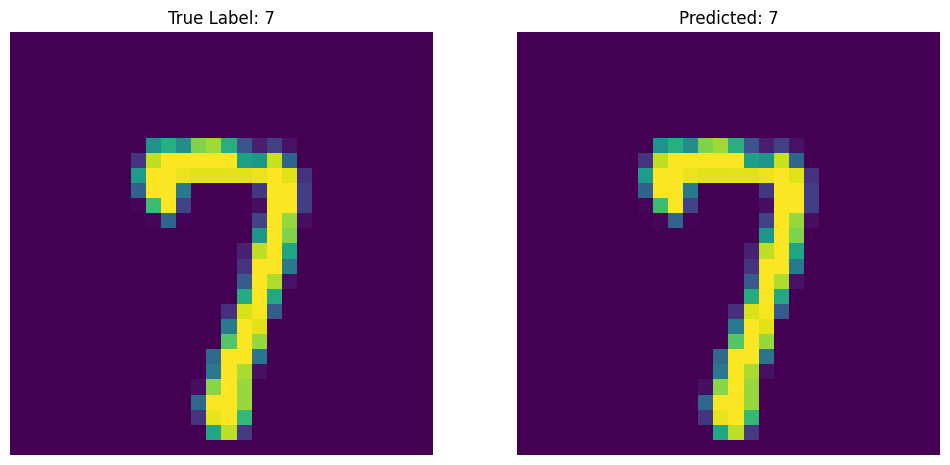

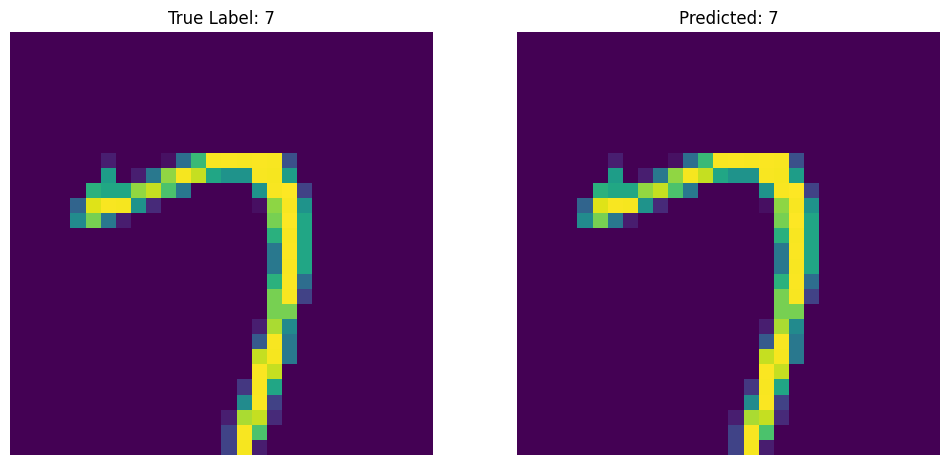

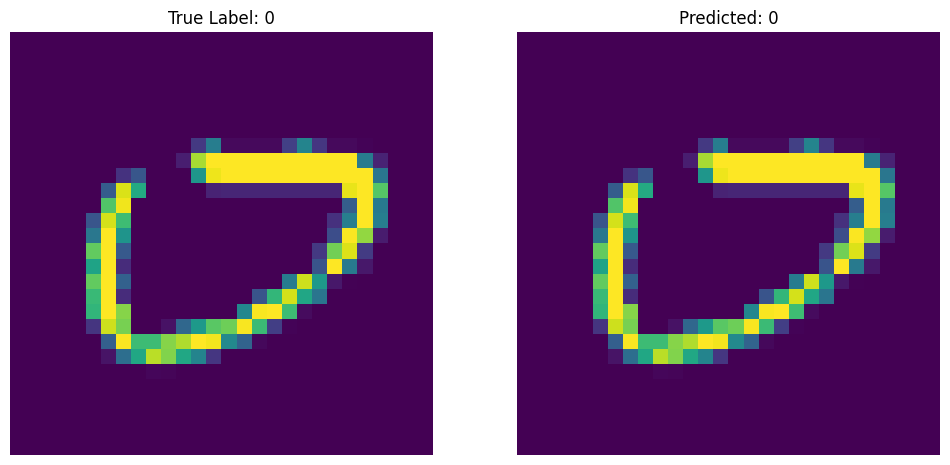

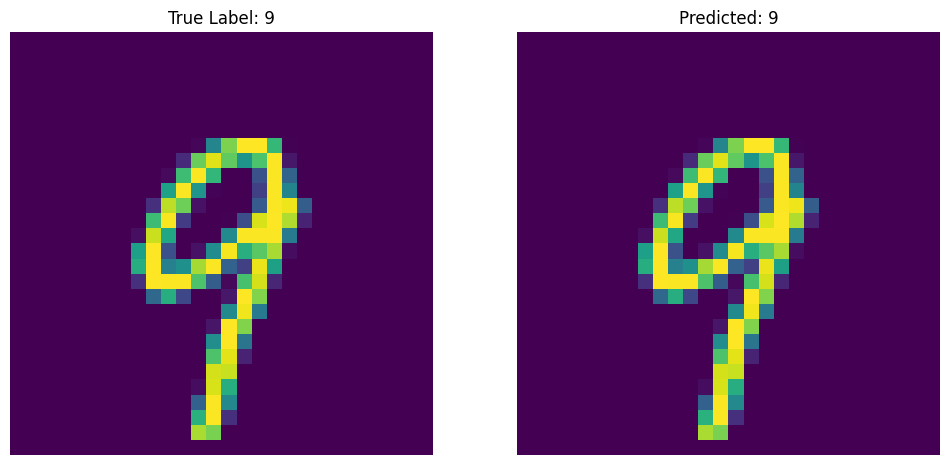

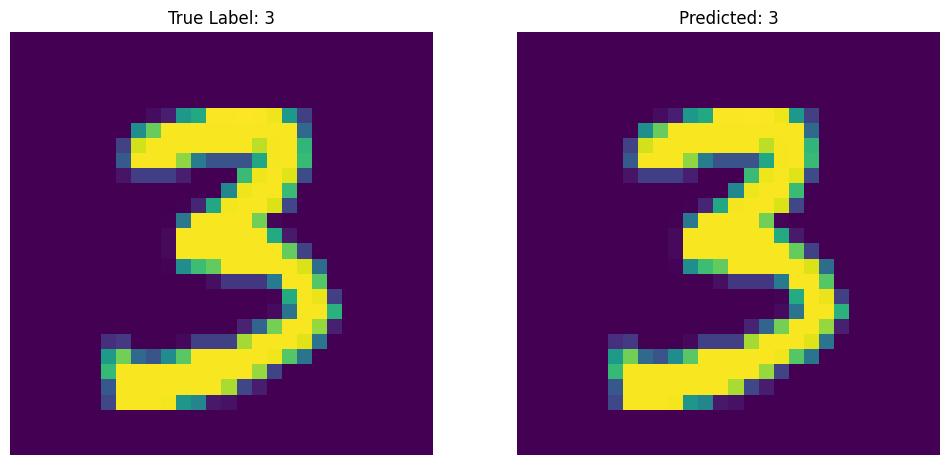

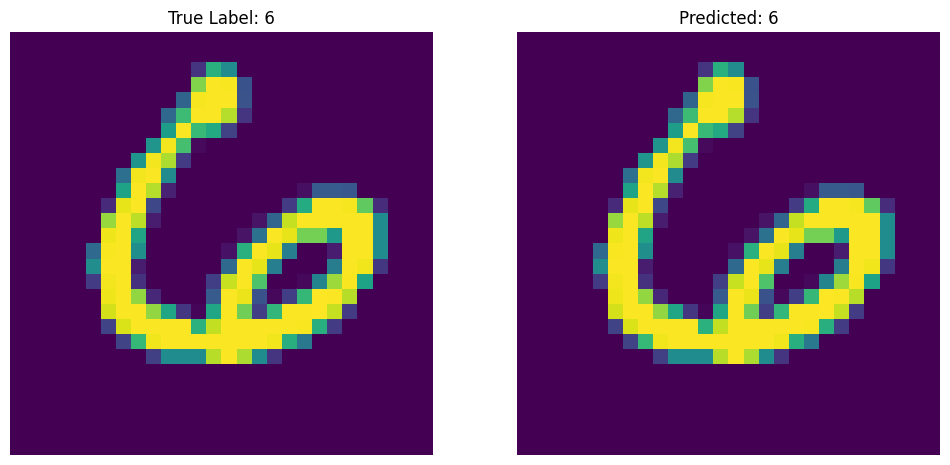

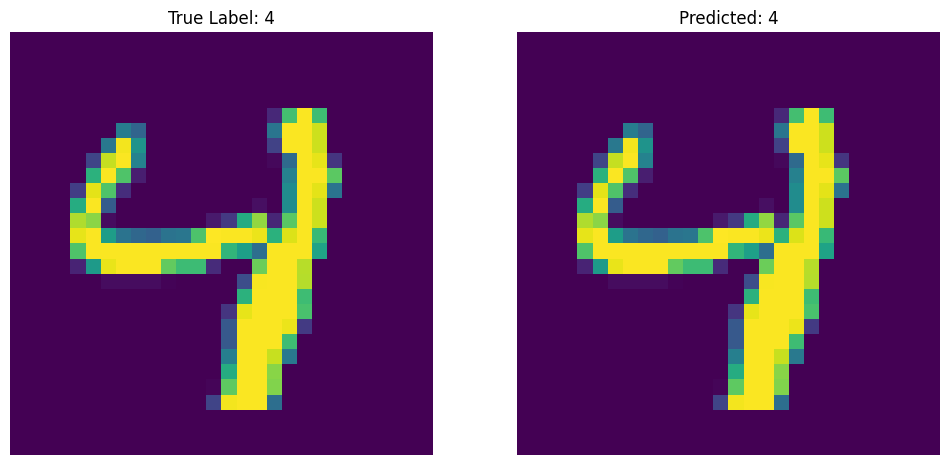

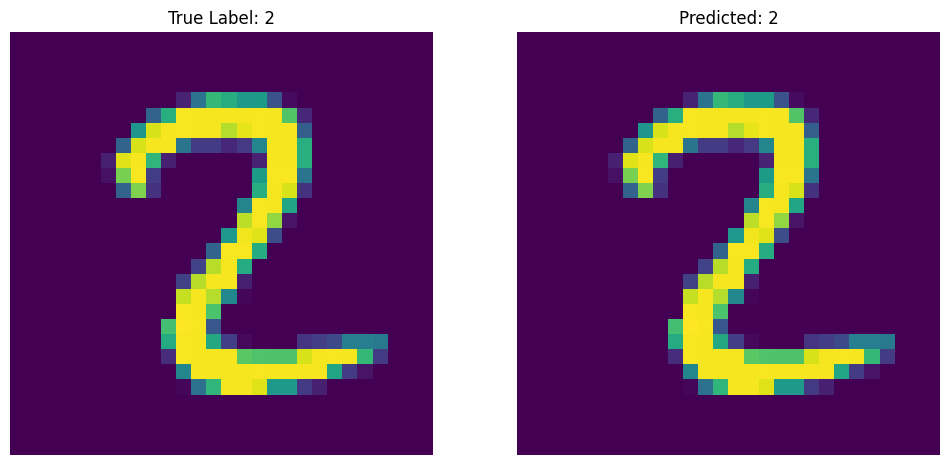

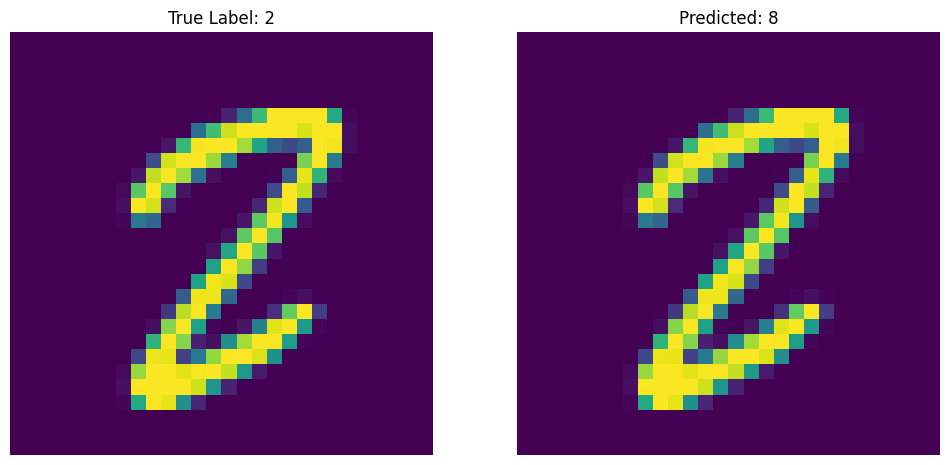

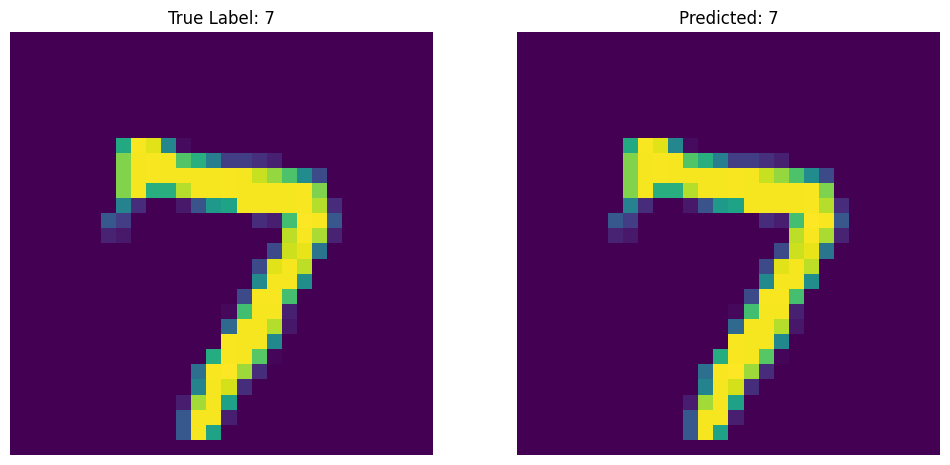

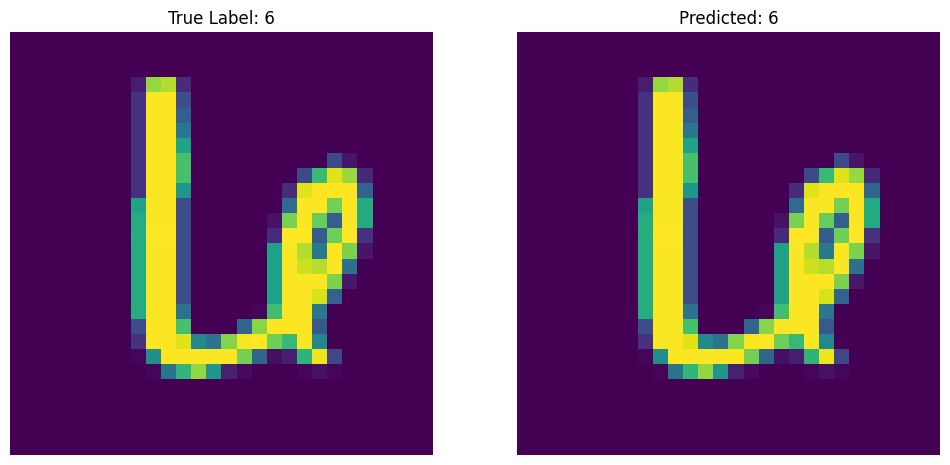

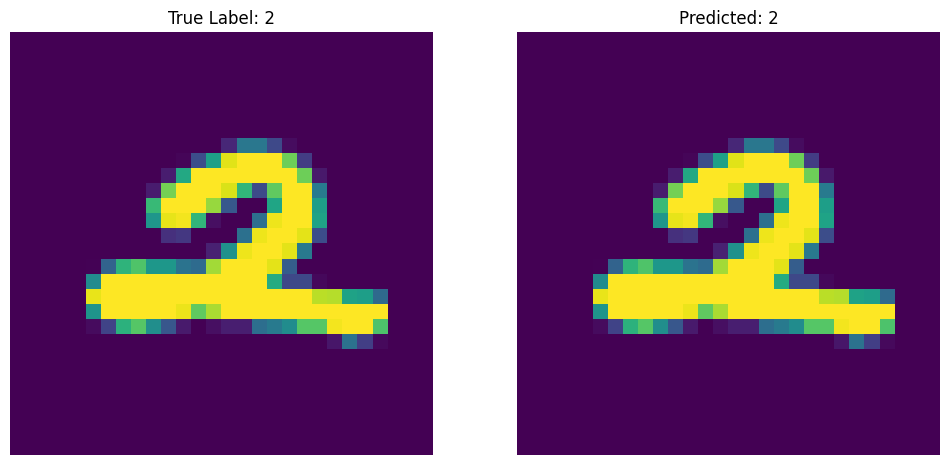

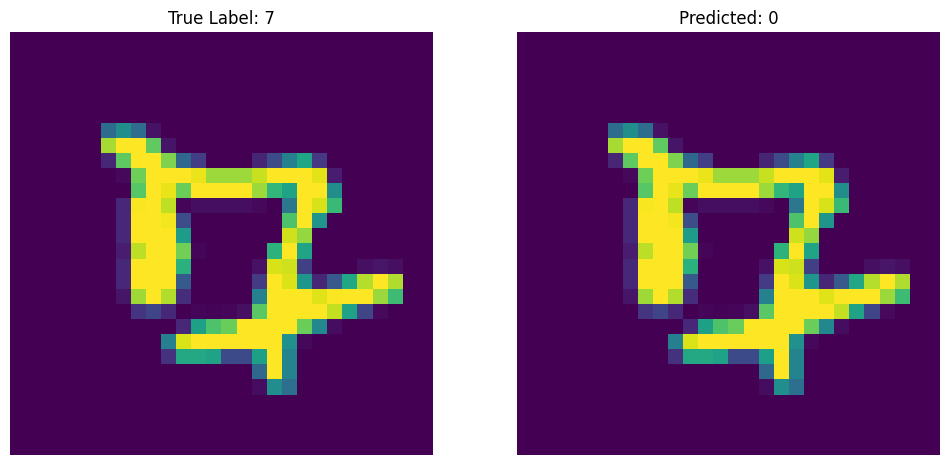

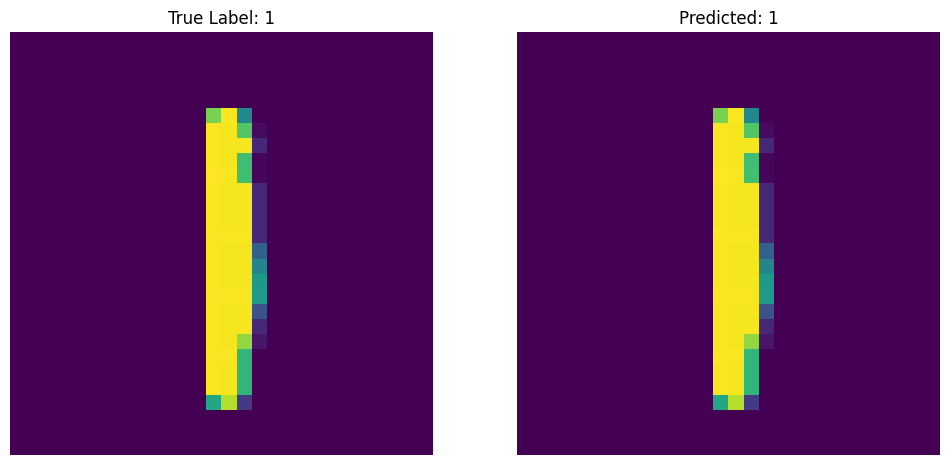

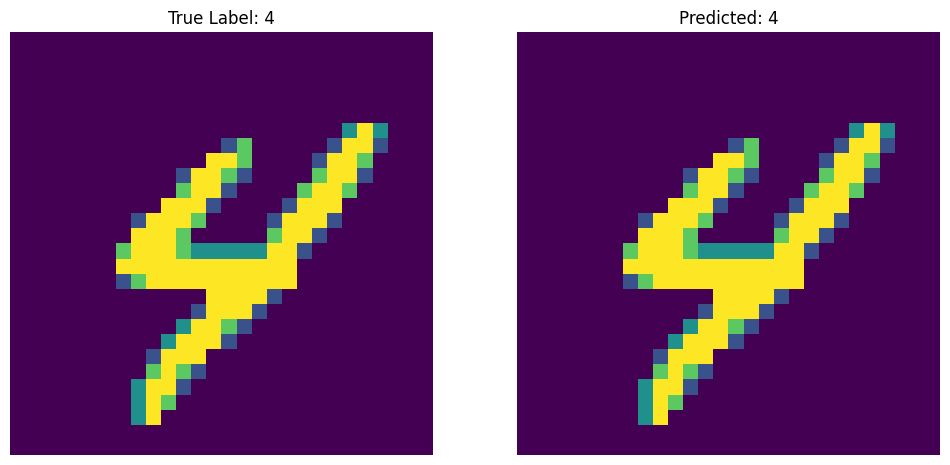

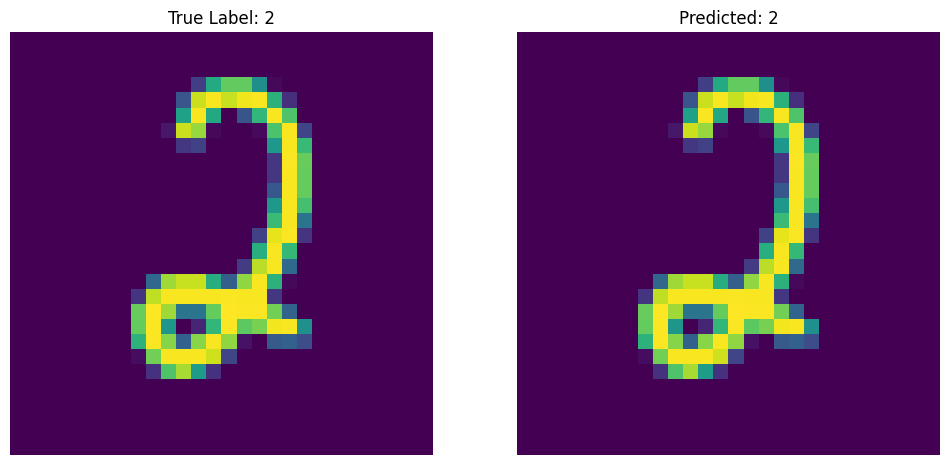

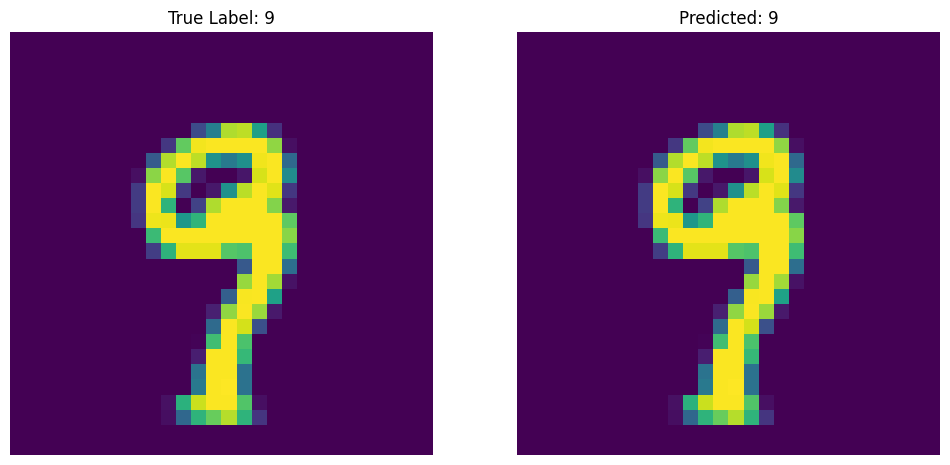

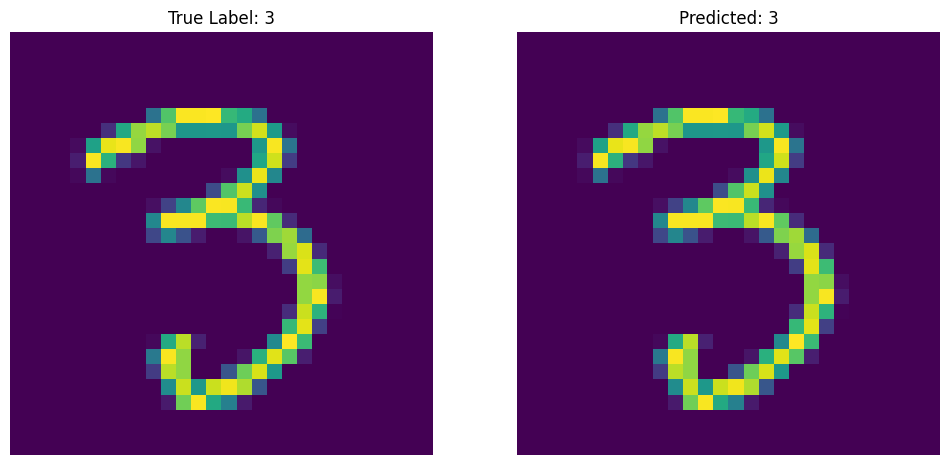

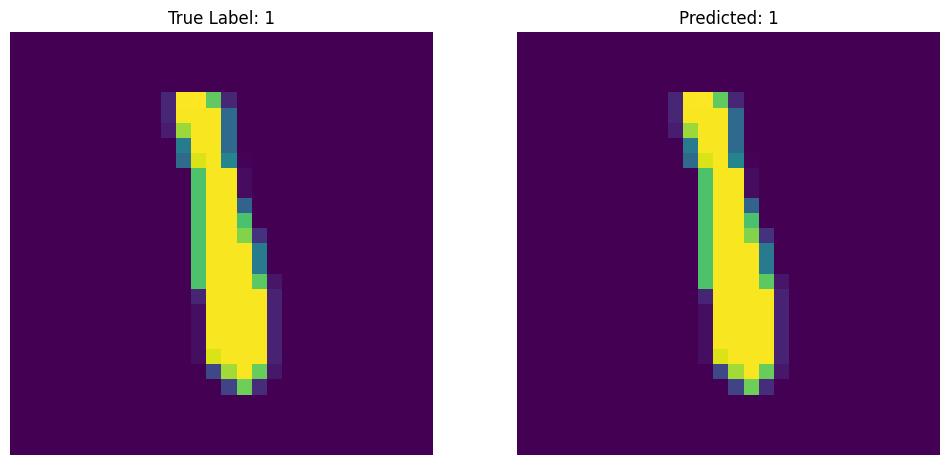

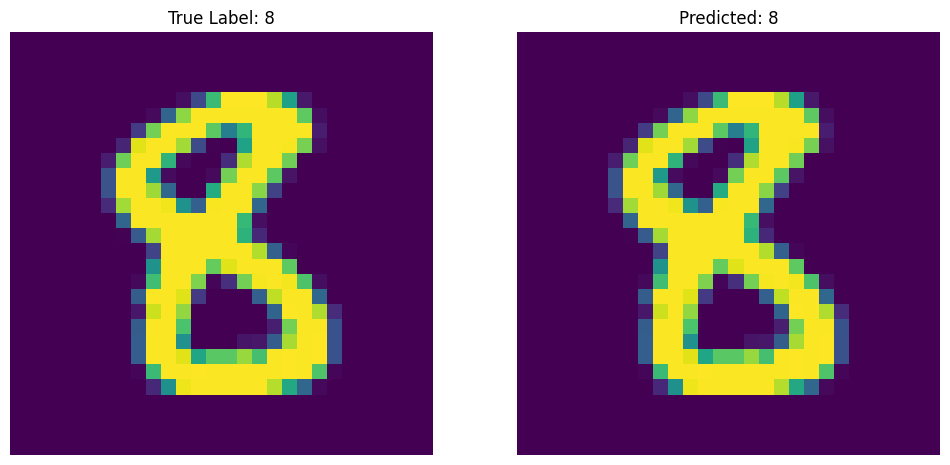

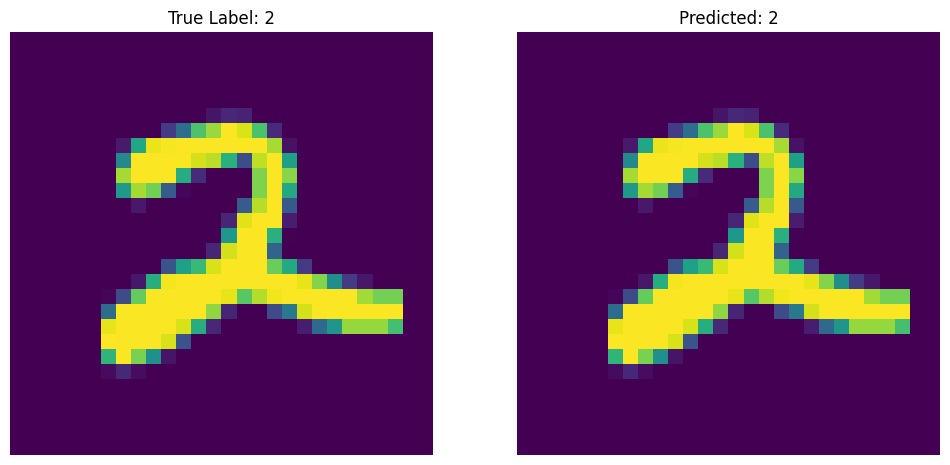

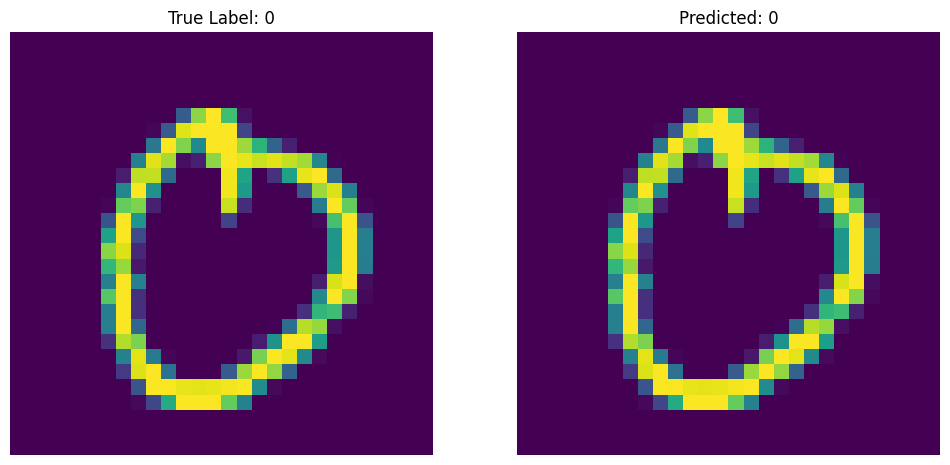

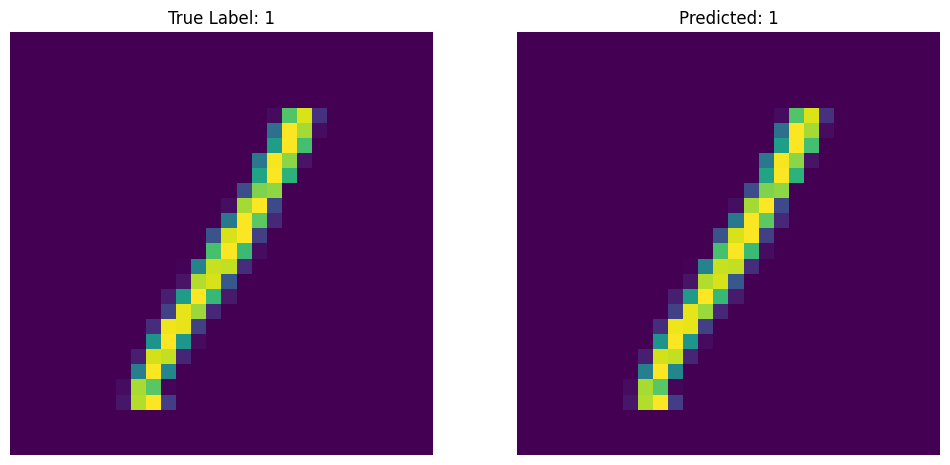

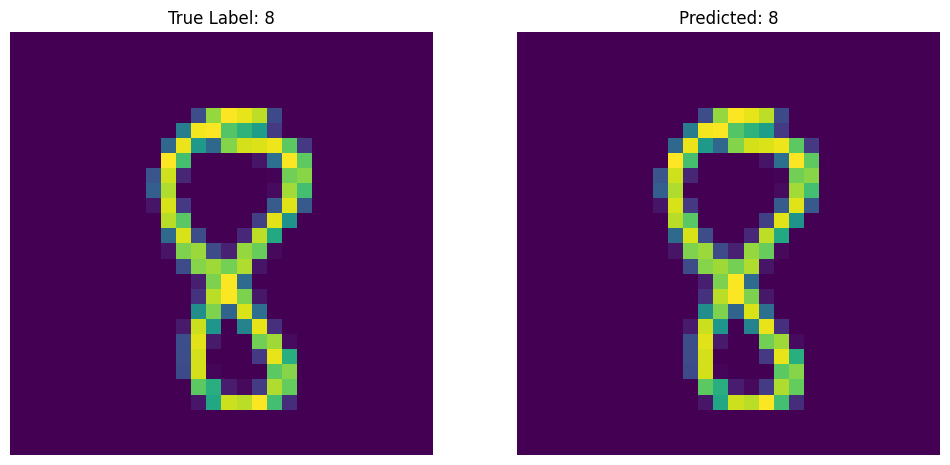

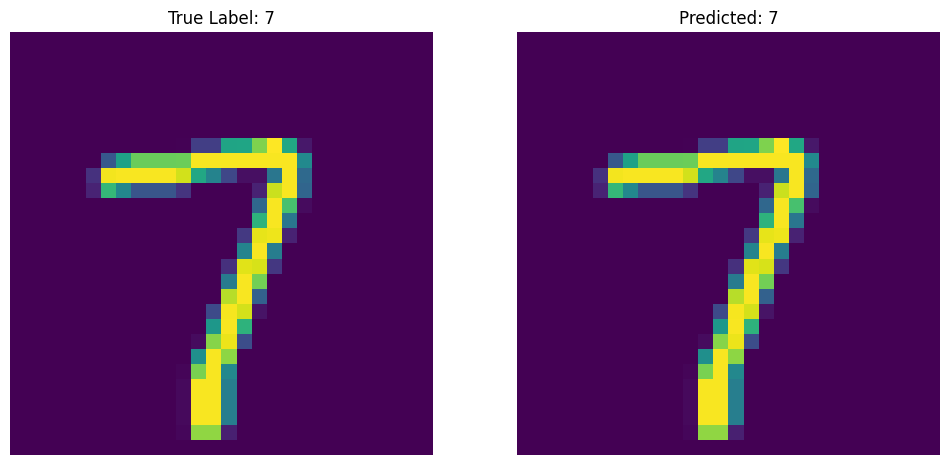

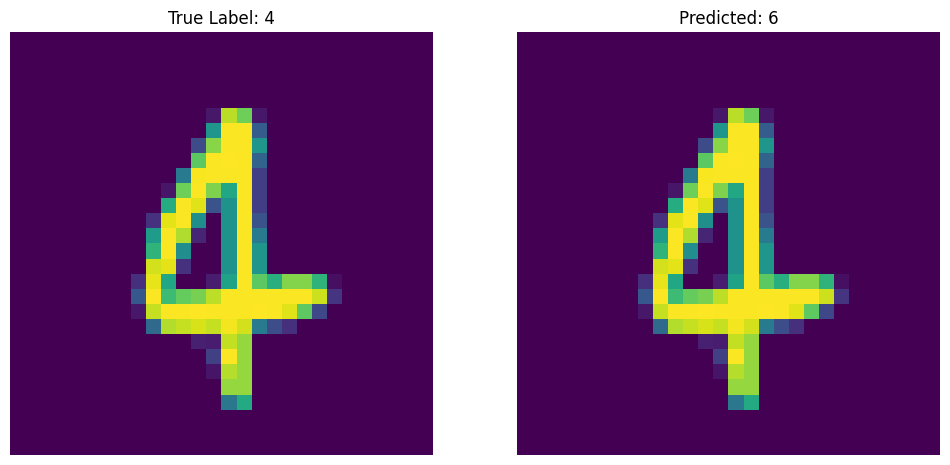

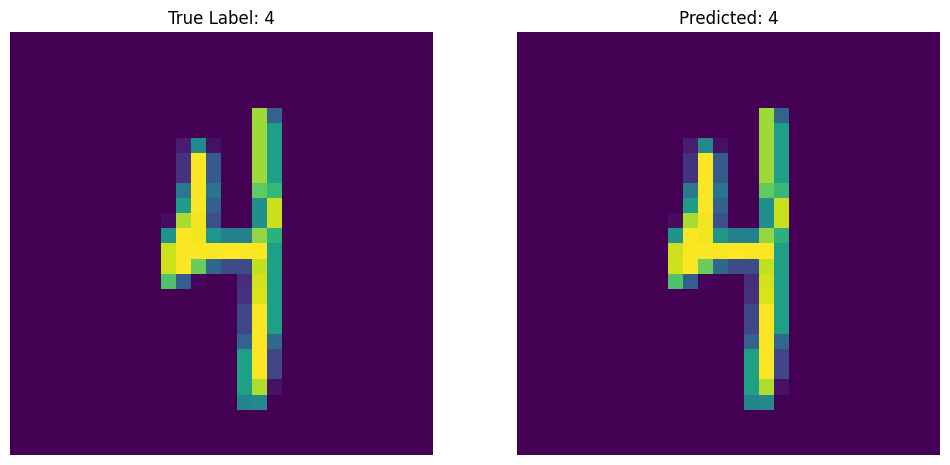

In [5]:
import matplotlib.pyplot as plt
import torch

for images, labels in test_set:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Asl rasmni olish
    img = images[0]
    img_show = img.permute(1, 2, 0)  # (C, H, W) -> (H, W, C)

    axs[0].imshow(img_show)
    axs[0].set_title(f"True Label: {labels[0].item()}")
    axs[0].axis("off")

    # Model prediksiya qilish
    with torch.no_grad():
        y_predict = model(images)  # batch berish kerak
        pred_label = torch.argmax(y_predict[0]).item()

    axs[1].imshow(img_show)
    axs[1].set_title(f"Predicted: {pred_label}")
    axs[1].axis("off")

    plt.show()


In [6]:
import pickle

with open('MNIST_model.pkl', 'wb') as file:
    pickle.dump(model, file)